## Citation Intention Analysis


In [ ]:
import pandas as pd
import numpy as np
import tensorflow

# Get Helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-12-01 12:10:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-01 12:10:04 (82.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
from sklearn.metrics import classification_report

#Getting & Importing dataset

In [ ]:
!wget https://s3-us-west-2.amazonaws.com/ai2-s2-research/scicite/scicite.tar.gz

--2022-12-01 12:10:05--  https://s3-us-west-2.amazonaws.com/ai2-s2-research/scicite/scicite.tar.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.147.200, 52.218.137.168, 52.218.136.48, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.147.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23189911 (22M) [application/x-tar]
Saving to: ‘scicite.tar.gz’

scicite.tar.gz      100%[===================>]  22.12M  8.55MB/s    in 2.6s    

2022-12-01 12:10:08 (8.55 MB/s) - ‘scicite.tar.gz’ saved [23189911/23189911]



##  Extracting dataset

In [ ]:
WORKING_DIR='/content/'
BASE_DIR='/content/scicite/'

In [ ]:
import tarfile
zip = tarfile.open(WORKING_DIR+'scicite.tar.gz')
zip.extractall()
zip.close()

##  Loading dataset

In [ ]:
train_df=pd.read_json(BASE_DIR+'train.jsonl',lines=True)
val_df=pd.read_json(BASE_DIR+'dev.jsonl',lines=True)
test_df=pd.read_json(BASE_DIR+'test.jsonl',lines=True)

In [ ]:
train_df.head(5)

,source,citeEnd,sectionName,citeStart,string,label,label_confidence,citingPaperId,citedPaperId,isKeyCitation,id,unique_id,excerpt_index,label2,label2_confidence
0,explicit,175.0,Introduction,168.0,"However, how frataxin interacts with the Fe-S ...",background,1.0,1872080baa7d30ec8fb87be9a65358cd3a7fb649,894be9b4ea46a5c422e81ef3c241072d4c73fdc0,True,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,11,NaN,NaN
1,explicit,36.0,Novel Quantitative Trait Loci for Seminal Root...,16.0,"In the study by Hickey et al. (2012), spikes w...",background,1.0,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b,b6642e19efb8db5623b3cc4eef1c5822a6151107,True,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,2,NaN,NaN
2,explicit,228.0,Introduction,225.0,"The drug also reduces catecholamine secretion,...",background,1.0,9cdf605beb1aa1078f235c4332b3024daa8b31dc,4e6a17fb8d7a3cada601d942e22eb5da6d01adbd,False,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,0,NaN,NaN
3,explicit,110.0,Discussion,46.0,By clustering with lowly aggressive close kin ...,background,1.0,d9f3207db0c79a3b154f3875c9760cc6b056904b,2cc6ff899bf17666ad35893524a4d61624555ed7,False,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,3,NaN,NaN
4,explicit,239.0,Discussion,234.0,Ophthalmic symptoms are rare manifestations of...,background,1.0,88b86556857f4374842d2af2e359576806239175,a5bb0ff1a026944d2a47a155462959af2b8505a8,False,88b86556857f4374842d2af2e359576806239175>a5bb0...,88b86556857f4374842d2af2e359576806239175>a5bb0...,2,NaN,NaN


# Exploring the dataset

In [ ]:
train_df['string'].iloc[0][int(train_df['citeStart'].iloc[0]):int(train_df['citeEnd'].iloc[0])]

'[12,22]'

In [ ]:
train_df['label'].value_counts()

background    4840
method        2294
result        1109
Name: label, dtype: int64

In [ ]:
train_df['label_confidence'].value_counts()

1.0000    3439
0.7416      11
0.7461      11
0.7509      11
0.7391      10
          ... 
0.7799       1
0.6400       1
0.7622       1
0.7682       1
0.6334       1
Name: label_confidence, Length: 929, dtype: int64

In [ ]:
train_df['isKeyCitation'].value_counts()

False    4600
True     3643
Name: isKeyCitation, dtype: int64

In [ ]:
train_df['label2'].value_counts()

not_supportive    471
supportive        356
cant_determine      8
Name: label2, dtype: int64

In [ ]:
train_df['label2_confidence'].value_counts()

1.0000    89
0.7420     2
0.7361     2
0.5231     2
0.7371     2
          ..
0.4301     1
0.4943     1
0.6196     1
0.5085     1
0.7509     1
Name: label2_confidence, Length: 215, dtype: int64

In [ ]:
train_df['source'].value_counts()

explicit        7886
properNoun       142
acronym          131
acronymParen      53
andPhrase         19
etAlPhrase        10
Name: source, dtype: int64

# Preparing dataset for baseline

## Replacing citations with $

In [ ]:
import re
def replace_citations(text):
  text=re.sub("[\(].?[^\)]*?[\d\d\d\d]{1}.*?[\)]{1}","[$]",text)
  return text

In [ ]:
train_df['string'][5]

'Recent studies identified Wee1 as a potential molecular target in cancer cells and the selective small molecule Wee1-inhibitor MK-1775 demonstrated promising results in cancer cells with enhanced levels of Wee1 (96-98).'

In [ ]:
replace_citations(train_df['string'][5])

'Recent studies identified Wee1 as a potential molecular target in cancer cells and the selective small molecule Wee1-inhibitor MK-1775 demonstrated promising results in cancer cells with enhanced levels of Wee1 [$].'

In [ ]:
train_df['string']=train_df['string'].apply(replace_citations)

In [ ]:
val_df['string']=val_df['string'].apply(replace_citations)
test_df['string']=test_df['string'].apply(replace_citations)

## Extracting text and labels

In [ ]:
train_sentences=train_df['string'].to_list()
val_sentences=val_df['string'].to_list()
test_sentences=test_df['string'].to_list()

In [ ]:
train_label=train_df['label'].to_numpy()
val_label=val_df['label'].to_numpy()
test_label=test_df['label'].to_numpy()

## Encoding labels

### Encoding label 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
train_label_one_hot=ohe.fit_transform(train_label.reshape(-1, 1))
val_label_one_hot=ohe.transform(val_label.reshape(-1, 1))
test_label_one_hot=ohe.transform(test_label.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_label_encoded=label_encoder.fit_transform(train_label)
val_label_encoded=label_encoder.transform(val_label)
test_label_encoded=label_encoder.transform(test_label)

In [ ]:
# Get class
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(3, array(['background', 'method', 'result'], dtype=object))

### Preparing label2

In [ ]:
train_df['label2'].value_counts()

not_supportive    471
supportive        356
cant_determine      8
Name: label2, dtype: int64

In [ ]:
train_df['label2']=train_df['label2'].apply(lambda x: 'cant_determine' if pd.isna(x) is True else x)
val_df['label2']=val_df['label2'].apply(lambda x: 'cant_determine' if pd.isna(x) is True else x)
test_df['label2']=test_df['label2'].apply(lambda x: 'cant_determine' if pd.isna(x) is True else x)

In [ ]:
train_label2=train_df['label2'].to_numpy()
val_label2=val_df['label2'].to_numpy()
test_label2=test_df['label2'].to_numpy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder2=LabelEncoder()
train_label2_encoded=label_encoder.fit_transform(train_label2)
val_label2_encoded=label_encoder.transform(val_label2)
test_label2_encoded=label_encoder.transform(test_label2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe2=OneHotEncoder(sparse=False)
train_label2_one_hot=ohe.fit_transform(train_label2.reshape(-1, 1))
val_label2_one_hot=ohe.transform(val_label2.reshape(-1, 1))
test_label2_one_hot=ohe.transform(test_label2.reshape(-1, 1))

In [ ]:
# Get class
num_classes2=len(label_encoder.classes_)
class_names2=label_encoder.classes_
num_classes2,class_names2

(3, array(['cant_determine', 'not_supportive', 'supportive'], dtype=object))

### Preparing isKeyCitation

In [ ]:
train_df['isKeyCitation']=train_df['isKeyCitation'].apply(lambda x: 1 if x is True else 0)
val_df['isKeyCitation']=val_df['isKeyCitation'].apply(lambda x: 1 if x is True else 0)
test_df['isKeyCitation']=test_df['isKeyCitation'].apply(lambda x: 1 if x is True else 0)

In [ ]:
train_isKey_label=train_df['isKeyCitation'].to_numpy()
val_isKey_label=val_df['isKeyCitation'].to_numpy()
test_isKey_label=test_df['isKeyCitation'].to_numpy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe3=OneHotEncoder(sparse=False)
train_iskey_one_hot=ohe.fit_transform(train_isKey_label.reshape(-1, 1))
val_iskey_one_hot=ohe.transform(val_isKey_label.reshape(-1, 1))
test_iskey_one_hot=ohe.transform(test_isKey_label.reshape(-1, 1))

# Computing class weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights=compute_class_weight(classes=class_names,y=train_label,class_weight='balanced')
class_weights={0:class_weights[0],
               1:class_weights[1],
               2:class_weights[2]}

In [ ]:
class_weights

{0: 0.5676997245179063, 1: 1.1977622784074398, 2: 2.4776074541629094}

# Model0: Baseline Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
pipeline.fit(train_sentences,train_label_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
pipeline.score(val_sentences,val_label_encoded)

0.6593886462882096

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
baseline_preds=pipeline.predict(val_sentences)

In [ ]:
print(classification_report(val_label_encoded,baseline_preds))

              precision    recall  f1-score   support

           0       0.64      0.98      0.77       538
           1       0.86      0.30      0.44       255
           2       0.00      0.00      0.00       123

    accuracy                           0.66       916
   macro avg       0.50      0.43      0.41       916
weighted avg       0.61      0.66      0.58       916



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
baseline_results=calculate_results(val_label_encoded,baseline_preds)
baseline_results

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 65.93886462882097,
 'precision': 0.6149560442089396,
 'recall': 0.6593886462882096,
 'f1': 0.5774118026265518}

In [ ]:
baseline_report=pd.DataFrame(classification_report(val_label_encoded,baseline_preds,output_dict=True)).transpose()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Preparing for Deep sequence modelling

In [ ]:
from tensorflow.keras.layers import TextVectorization,Embedding
import tensorflow as tf

In [ ]:
sent_len=[len(sentence.split()) for sentence in train_sentences]
avg_sent_len=np.mean(sent_len)
avg_sent_len

29.66686885842533

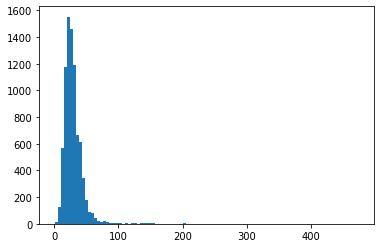

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_len,bins=100);

In [ ]:
#How long of a sentence length covers 95% of all of the sentences
output_seq_len=int(np.percentile(sent_len,98))
output_seq_len

65

In [ ]:
#max sequence length
max_len=max(sent_len)
max_len

474

## Text Vectorization

In [ ]:
#Text vectorization layer
#max tokens= Number of max words in the data
# How many words in Vocab (Max tokens)? (taken from table 2 of the paper)
# Output_sequence_length= length of output sentence
max_tokens=68000
text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  split='whitespace',
                                  output_sequence_length=output_seq_len)

In [ ]:
#Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Test text vectorizer on random sentences
import random
target_sentence=random.choice(train_sentences)
print(f'Text:\n {target_sentence}')
print(f'\nLength of text: {len(target_sentence.split())}')
print(f'\n Vectorized text: {text_vectorizer([target_sentence])}')

Text:
 Primary cardiomyocyte cultures from 1-day-old Wistar rats were prepared according to the procedure described previously [$].

Length of text: 16

 Vectorized text: [[  338  8096  1447    18 27954  4503   445    20  1341   182     6     2
    518    49    45     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]


In [ ]:
vectorizer_vocab_token=text_vectorizer.get_vocabulary()
print(f'Number of words in vocab: {len(vectorizer_vocab_token)}')
print(f'Most common words in vocab: {vectorizer_vocab_token[:5]}')
print(f'Least common words in vocab: {vectorizer_vocab_token[-5:]}')

Number of words in vocab: 28298
Most common words in vocab: ['', '[UNK]', 'the', 'of', 'and']
Least common words in vocab: ['00019', '0001', '00005', '00001', '\x02̂']


## Embedding layer

In [ ]:
output_dim=64 #Use size according to dataset
#input_dims=Vocab length
#mask_zero saves space by masking 0 values out with are padding
embedding=Embedding(input_dim=len(vectorizer_vocab_token),output_dim=output_dim,
                    mask_zero=True,name='token_embedding')

In [ ]:
print(f'Sentence before vectorization:\n {target_sentence}')
vectorized_sentence=text_vectorizer([target_sentence])
print(f'Sentence after vectorization:\n {vectorized_sentence}')
embedded_sentence=embedding(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}")
print(f'Shape after embedding:\n {embedded_sentence.shape}')

Sentence before vectorization:
 Primary cardiomyocyte cultures from 1-day-old Wistar rats were prepared according to the procedure described previously [$].
Sentence after vectorization:
 [[  338  8096  1447    18 27954  4503   445    20  1341   182     6     2
    518    49    45     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]
Sentence after embedding:
 [[[-2.4199598e-03 -2.6784634e-02 -4.2375650e-02 ...  1.0403682e-02
    4.3603789e-02 -7.8597069e-03]
  [-2.7434517e-02  2.5419842e-02 -3.6625218e-02 ...  1.0908116e-02
   -2.4193823e-02  3.1925738e-05]
  [ 8.2157739e-03  2.3824427e-02  1.8261801e-02 ...  2.0506490e-02
   -2.6571607e-02  3.7936974e-02]
  ...
  [-4.8392739e-02  1.5733015e-02  3.4390092e-03 ...  1.5117589e-02
   -4

# Creating tensorflow dataset for fast input pipeline

In [ ]:
import tensorflow as tf

In [ ]:
# Turn our data into tensorflow dataets
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_label_one_hot))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_label_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_label_one_hot))

In [ ]:
# Take the tensorflow datasets batch and prefetch them
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Modelling Deep Sequence Models

## Model 1: Cov1d with with custom embeddings

In [ ]:
inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,))

x=text_vectorizer(inputs)
x=embedding(x)

x=tf.keras.layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model1=tf.keras.Model(inputs,outputs)

In [ ]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 65)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 65, 64)           1811072   
                                                                 
 conv1d (Conv1D)             (None, 65, 64)            20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 195   

In [ ]:
history1=model1.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    validation_steps=int(0.1*len(val_dataset)),
                    class_weight=class_weights)

Epoch 1/5
258/258 [==============================] - 14s 11ms/step - loss: 0.7642 - accuracy: 0.6724 - val_loss: 0.6376 - val_accuracy: 0.7812
Epoch 2/5
258/258 [==============================] - 2s 9ms/step - loss: 0.3551 - accuracy: 0.8543 - val_loss: 0.6518 - val_accuracy: 0.7344
Epoch 3/5
258/258 [==============================] - 3s 12ms/step - loss: 0.1598 - accuracy: 0.9431 - val_loss: 0.6619 - val_accuracy: 0.7344
Epoch 4/5
258/258 [==============================] - 3s 10ms/step - loss: 0.0553 - accuracy: 0.9848 - val_loss: 0.7132 - val_accuracy: 0.7812
Epoch 5/5
258/258 [==============================] - 3s 10ms/step - loss: 0.0229 - accuracy: 0.9948 - val_loss: 0.7340 - val_accuracy: 0.7969


In [ ]:
model1.evaluate(val_dataset)

29/29 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.7991


[0.6796358823776245, 0.7991266250610352]

In [ ]:
model1_pred_probs=model1.predict(val_dataset)
model1_pred=tf.argmax(model1_pred_probs,axis=1)
model1_results=calculate_results(val_label_encoded,model1_pred)

29/29 [==============================] - 1s 5ms/step


In [ ]:
model1_results

{'accuracy': 79.91266375545851,
 'precision': 0.7995717122800368,
 'recall': 0.7991266375545851,
 'f1': 0.7989095517833563}

In [ ]:
model1_report=pd.DataFrame(classification_report(val_label_encoded,model1_pred,output_dict=True)).transpose()

## Model 2: using bidirectional GRU with Token Embedding

In [ ]:
inputs=tf.keras.layers.Input(dtype=tf.string,shape=[])

x=text_vectorizer(inputs)
x=embedding(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16,activation='tanh'))(x)
outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model2=tf.keras.Model(inputs,outputs)

In [ ]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
258/258 [==============================] - 27s 46ms/step - loss: 0.3337 - accuracy: 0.8652 - val_loss: 0.7593 - val_accuracy: 0.7812
Epoch 2/5
258/258 [==============================] - 9s 34ms/step - loss: 0.0501 - accuracy: 0.9839 - val_loss: 1.2315 - val_accuracy: 0.7656
Epoch 3/5
258/258 [==============================] - 8s 29ms/step - loss: 0.0172 - accuracy: 0.9955 - val_loss: 1.2327 - val_accuracy: 0.7969
Epoch 4/5
258/258 [==============================] - 8s 30ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 1.3054 - val_accuracy: 0.7656
Epoch 5/5
258/258 [==============================] - 9s 37ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 1.4455 - val_accuracy: 0.7812


In [ ]:
model2.evaluate(val_dataset)

29/29 [==============================] - 0s 14ms/step - loss: 1.1705 - accuracy: 0.7828


[1.170472502708435, 0.7827510833740234]

In [ ]:
model2_pred_probs=model2.predict(val_dataset)
model2_pred=tf.argmax(model2_pred_probs,axis=1)
model2_results=calculate_results(val_label_encoded,model2_pred)

29/29 [==============================] - 5s 9ms/step


In [ ]:
model2_results

{'accuracy': 78.27510917030568,
 'precision': 0.7823024416428499,
 'recall': 0.7827510917030568,
 'f1': 0.7811111046136989}

In [ ]:
model2_report=pd.DataFrame(classification_report(val_label_encoded,model2_pred,output_dict=True)).transpose()

## Model3: Conv1D on character level embedding

### Character level tokenizer

In [ ]:
def split_chars(text):
  return ' '.join(list(text))

In [ ]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]

In [ ]:
char_len=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_len)
mean_char_len

193.86133689190828

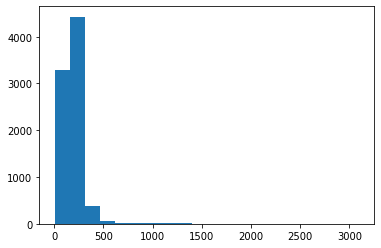

In [ ]:
# check distribution

import matplotlib.pyplot as plt

plt.hist(char_len,bins=20);

In [ ]:
#find what character length covers 95% of sequences
output_seq_char_len=int(np.percentile(char_len,98))

In [ ]:
output_seq_char_len

431

In [ ]:
#number of alphanumeric characters: there are punctuations and > < signs
#otherwise alpha was sufficient
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
random.choice(train_sentences)

'Fish abundance at each site was estimated using multiple-pass depletion methods [$], val-'

In [ ]:
num_char_tokens=len(alphabet) + 2 # add for space and UNK

In [ ]:
char_vectorizer=TextVectorization(max_tokens=num_char_tokens,
                                  output_sequence_length=output_seq_char_len,
                                  name='char_vectorizer')

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
#check character vocab stats
char_vocab=char_vectorizer.get_vocabulary()
print(f'Number of different characters in character vocab: {len(char_vocab)}')
print(f'5 Most common characters: {char_vocab[:5]}')
print(f'5 least common characters: {char_vocab[-5:]}')

Number of different characters in character vocab: 70
5 Most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['Ñ', '¼', 'Œ', '±', '¡']


In [ ]:
random_train_chars=random.choice(train_chars)
print(f'Charified text:\n {random_train_chars}')
print(f'Length of random_train_chars: {len(random_train_chars.split())}')
vectorized_chars=char_vectorizer([random_train_chars])
print(f'Vectorized chars:\n {vectorized_chars}')
print(f' Length of Vectorized chars:\n {len(vectorized_chars[0])}')

Charified text:
 … f r e e l y   ( i n   o r d e r   t o   o p t i m i z e   a c c u r a c y   o f   p a r a m e t e r   e s t i m a t e s ) ,   V O 2 p   d a t a   w e r e   m o d e l e d   f r o m   t h e   b e g i n n i n g   o f   p h a s e   I I   t o   4   m i n   [ $ ]   o f   t h e   s t e p - t r a n s i t i o n ;   t h i s   e n s u r e d   t h a t   e a c h   s u b j e c t   h a d   a t t a i n e d   a   V O 2 p   s t e a d y - s t a t e ,   y e t   d i d   n o t   b i a s   t h e   m o d e l   f i t   d u r i n g   t h e   o n - t r a n s i e n t   [ $ ] .
Length of random_train_chars: 233
Vectorized chars:
 [[38 17  9  2  2 10 19  4  6  7  9 12  2  9  3  7  7 15  3  4 16  4 31  2
   5 11 11 14  9  5 11 19  7 17 15  5  9  5 16  2  3  2  9  2  8  3  4 16
   5  3  2  8 21  7 25 15 12  5  3  5 22  2  9  2 16  7 12  2 10  2 12 17
   9  7 16  3 13  2 20  2 18  4  6  6  4  6 18  7 17 15 13  5  8  2  4  4
   3  7 29 16  4  6  7 17  3 13  2  8  3  2 15  3  9  5  6  8  4  3  4  7
  

### Character level Embedding

In [ ]:
output_dim=24 #Use size according to dataset
#input_dims=Vocab length
#mask_zero saves space by masking 0 values out with are padding
char_embedding=Embedding(input_dim=len(char_vocab),
                         output_dim=output_dim,
                         mask_zero=True,
                         name='char_embedding')

In [ ]:
random_train_chars=random.choice(train_chars)
print(f'Charified text:\n {random_train_chars}')
print(f'Length of random_train_chars: {len(random_train_chars.split())}')
embedded_chars=char_embedding(char_vectorizer([random_train_chars]))
print(f'Embedded chars:\n {embedded_chars}')
print(f'shape of embedded chars:\n {embedded_chars.shape}')

Charified text:
 F i v e   o f   8   s u b s c a l e s   o f   t h i s   p r e v i o u s l y   v a l i d a t e d   i n s t r u m e n t   w e r e   u s e d :   [ $ ]   l i m i t a t i o n s   i n   p h y s i c a l   a c t i v i t i e s   b e c a u s e   o f   p h y s i c a l   o r   e m o t i o n a l   p r o b l e m s ;   [ $ ]   l i m i t a t i o n s   i n   u s u a l   r o l e   a c t i v i t i e s   b e c a u s e   o f   p h y s i c a l   h e a l t h   p r o b l e m s ;   [ $ ]   l i m i t a t i o n s   i n   u s u a l   r o l e   a c t i v i t i e s   b e c a u s e   o f   e m o t i o n a l   h e a l t h   p r o b l e m s ;   [ $ ]   g e n e r a l   h e a l t h   p e r c e p t i o n s ;   a n d   [ $ ]   g e n e r a l   m e n t a l   h e a l t h .
Length of random_train_chars: 320
Embedded chars:
 [[[-0.04580119  0.04396378 -0.00761794 ... -0.0067329  -0.03035941
    0.00085342]
  [ 0.01922232  0.02352642 -0.04825797 ...  0.04942432  0.04178167
   -0.04340403]
  [ 0.00575004 -0.0096

### Char-level Dataset

In [ ]:
#char level datasets
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

### Modelling

In [ ]:
import tensorflow as tf
inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,))

x=char_vectorizer(inputs)
x=char_embedding(x)

x=tf.keras.layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(x)
x=tf.keras.layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model3=tf.keras.Model(inputs,outputs)

In [ ]:
model3.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 431)              0         
 ization)                                                        
                                                                 
 char_embedding (Embedding)  (None, 431, 24)           1680      
                                                                 
 conv1d_1 (Conv1D)           (None, 431, 64)           7744      
                                                                 
 conv1d_2 (Conv1D)           (None, 431, 64)           20544     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                          

In [ ]:
history3=model3.fit(train_char_dataset,
                    epochs=7,
                    validation_data=val_char_dataset,
                    validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/7
258/258 [==============================] - 2s 6ms/step - loss: 0.9318 - accuracy: 0.5828 - val_loss: 0.9353 - val_accuracy: 0.6406
Epoch 2/7
258/258 [==============================] - 2s 6ms/step - loss: 0.7801 - accuracy: 0.6786 - val_loss: 0.7600 - val_accuracy: 0.6875
Epoch 3/7
258/258 [==============================] - 2s 8ms/step - loss: 0.6585 - accuracy: 0.7359 - val_loss: 0.7055 - val_accuracy: 0.7031
Epoch 4/7
258/258 [==============================] - 1s 6ms/step - loss: 0.5699 - accuracy: 0.7746 - val_loss: 0.6321 - val_accuracy: 0.7656
Epoch 5/7
258/258 [==============================] - 2s 6ms/step - loss: 0.4871 - accuracy: 0.8083 - val_loss: 0.5771 - val_accuracy: 0.7812
Epoch 6/7
258/258 [==============================] - 1s 5ms/step - loss: 0.4401 - accuracy: 0.8288 - val_loss: 0.5867 - val_accuracy: 0.7812
Epoch 7/7
258/258 [==============================] - 1s 6ms/step - loss: 0.4108 - accuracy: 0.8403 - val_loss: 0.5935 - val_accuracy: 0.7812


In [ ]:
model3.evaluate(val_char_dataset)

29/29 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.8002


[0.5194820165634155, 0.8002183437347412]

In [ ]:
model3_pred_probs=model3.predict(val_char_dataset)
model3_preds=tf.argmax(model3_pred_probs,axis=1)
model3_results=calculate_results(val_label_encoded,model3_preds)

29/29 [==============================] - 0s 3ms/step


In [ ]:
model3_results

{'accuracy': 80.02183406113537,
 'precision': 0.8012216378294529,
 'recall': 0.8002183406113537,
 'f1': 0.7959172778850897}

In [ ]:
model3_report=pd.DataFrame(classification_report(val_label_encoded,model3_preds,output_dict=True)).transpose()

## Model4: Bi-GRU model on character embeddings

In [ ]:
inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,))

x=char_vectorizer(inputs)
x=char_embedding(x)

x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(x)

outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model4=tf.keras.Model(inputs,outputs)

In [ ]:
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 431)              0         
 ization)                                                        
                                                                 
 char_embedding (Embedding)  (None, 431, 24)           1680      
                                                                 
 bidirectional_2 (Bidirectio  (None, 431, 64)          11136     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 431, 64)          18816     
 nal)                                                            
                                                           

In [ ]:
model4.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
history4=model4.fit(train_char_dataset,
                    epochs=7,
                    validation_data=val_char_dataset,
                    validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/7
258/258 [==============================] - 62s 165ms/step - loss: 0.8900 - accuracy: 0.6034 - val_loss: 0.8733 - val_accuracy: 0.6094
Epoch 2/7
258/258 [==============================] - 36s 141ms/step - loss: 0.8197 - accuracy: 0.6342 - val_loss: 0.8835 - val_accuracy: 0.6250
Epoch 3/7
258/258 [==============================] - 37s 143ms/step - loss: 0.7890 - accuracy: 0.6499 - val_loss: 0.8765 - val_accuracy: 0.7031
Epoch 4/7
258/258 [==============================] - 37s 145ms/step - loss: 0.7234 - accuracy: 0.7040 - val_loss: 0.6787 - val_accuracy: 0.7344
Epoch 5/7
258/258 [==============================] - 36s 141ms/step - loss: 0.6765 - accuracy: 0.7278 - val_loss: 0.6782 - val_accuracy: 0.7656
Epoch 6/7
258/258 [==============================] - 37s 145ms/step - loss: 0.6457 - accuracy: 0.7409 - val_loss: 0.6598 - val_accuracy: 0.7969
Epoch 7/7
258/258 [==============================] - 35s 137ms/step - loss: 0.6218 - accuracy: 0.7529 - val_loss: 0.6527 - val_accuracy:

In [ ]:
model4.evaluate(val_char_dataset)

29/29 [==============================] - 1s 32ms/step - loss: 0.6593 - accuracy: 0.7424


[0.6592695116996765, 0.7423580884933472]

In [ ]:
model_4_pred_probs=model4.predict(val_char_dataset)
model4_preds=tf.argmax(model_4_pred_probs,axis=1)
model4_results=calculate_results(val_label_encoded,model4_preds)

29/29 [==============================] - 9s 32ms/step


In [ ]:
model4_report=pd.DataFrame(classification_report(val_label_encoded,model4_preds,output_dict=True)).transpose()

## Model 5: Using Transformer model BERT


In [ ]:
!pip uninstall -y -q tensorflow-text
!pip install -q -U "tensorflow-text==2.9.*"

     |████████████████████████████████| 4.6 MB 31.6 MB/s 


In [ ]:
import tensorflow_text
import tensorflow_hub as hub
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

encoder = hub.KerasLayer(
    "https://tfhub.dev/google/experts/bert/wiki_books/2",
    trainable=False)

In [ ]:
inputs = tf.keras.layers.Input(shape=(), dtype=tf.string)

x= preprocessor(inputs)
x = encoder(x)
x = x["sequence_output"]
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model5=tf.keras.Model(inputs,outputs)

In [ ]:
model5.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['input_5[0][0]']                
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
history5=model5.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
258/258 [==============================] - 115s 355ms/step - loss: 0.5440 - accuracy: 0.7737 - val_loss: 0.5484 - val_accuracy: 0.7812
Epoch 2/5
258/258 [==============================] - 91s 355ms/step - loss: 0.3685 - accuracy: 0.8598 - val_loss: 0.5352 - val_accuracy: 0.8125
Epoch 3/5
258/258 [==============================] - 91s 352ms/step - loss: 0.2893 - accuracy: 0.8954 - val_loss: 0.6552 - val_accuracy: 0.8125
Epoch 4/5
258/258 [==============================] - 93s 359ms/step - loss: 0.2172 - accuracy: 0.9265 - val_loss: 0.6198 - val_accuracy: 0.8125
Epoch 5/5
258/258 [==============================] - 94s 363ms/step - loss: 0.1663 - accuracy: 0.9412 - val_loss: 0.6586 - val_accuracy: 0.8438


In [ ]:
model5.evaluate(val_dataset)

29/29 [==============================] - 10s 341ms/step - loss: 0.6394 - accuracy: 0.8002


[0.6394035816192627, 0.8002183437347412]

In [ ]:
model5_pred_probs=model5.predict(val_dataset)
model5_pred=tf.argmax(model5_pred_probs,axis=1)
model5_results=calculate_results(val_label_encoded,model5_pred)

29/29 [==============================] - 12s 327ms/step


In [ ]:
model5_results

{'accuracy': 80.02183406113537,
 'precision': 0.8252474106693416,
 'recall': 0.8002183406113537,
 'f1': 0.7982303759149589}

In [ ]:
model5.evaluate(test_dataset)

59/59 [==============================] - 20s 343ms/step - loss: 0.7561 - accuracy: 0.7593


[0.7560896277427673, 0.7592692375183105]

In [ ]:
model5_report=pd.DataFrame(classification_report(val_label_encoded,model5_pred,output_dict=True)).transpose()

## Model 6: Using Pretrained Embeddings

In [ ]:
import tensorflow_hub as hub
pretrained_embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False)

In [ ]:
inputs=tf.keras.layers.Input(dtype=tf.string,shape=[])
x=pretrained_embedding(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model6=tf.keras.Model(inputs,outputs)

In [ ]:
model6.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
history6=model6.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
258/258 [==============================] - 7s 14ms/step - loss: 0.6613 - accuracy: 0.7212 - val_loss: 0.5999 - val_accuracy: 0.7344
Epoch 2/5
258/258 [==============================] - 3s 12ms/step - loss: 0.4965 - accuracy: 0.8058 - val_loss: 0.5927 - val_accuracy: 0.7188
Epoch 3/5
258/258 [==============================] - 3s 12ms/step - loss: 0.4623 - accuracy: 0.8188 - val_loss: 0.6009 - val_accuracy: 0.7188
Epoch 4/5
258/258 [==============================] - 3s 13ms/step - loss: 0.4303 - accuracy: 0.8339 - val_loss: 0.5941 - val_accuracy: 0.7188
Epoch 5/5
258/258 [==============================] - 3s 13ms/step - loss: 0.3936 - accuracy: 0.8490 - val_loss: 0.5975 - val_accuracy: 0.7344


In [ ]:
model6.evaluate(val_dataset)

29/29 [==============================] - 0s 11ms/step - loss: 0.5674 - accuracy: 0.7871


[0.5673770904541016, 0.7871178984642029]

In [ ]:
model6_pred_probs=model6.predict(val_dataset)
model6_pred=tf.argmax(model6_pred_probs,axis=1)
model6_results=calculate_results(val_label_encoded,model6_pred)

29/29 [==============================] - 1s 11ms/step


In [ ]:
model6_results

{'accuracy': 78.7117903930131,
 'precision': 0.7896169677260514,
 'recall': 0.787117903930131,
 'f1': 0.7881334101194435}

In [ ]:
model6_report=pd.DataFrame(classification_report(val_label_encoded,model6_pred,output_dict=True)).transpose()

## Hybrid char and token dataset

In [ ]:
# combines chars and tokens into the dataset
train_hybrid_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_hybrid_labels=tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_hybrid_dataset=tf.data.Dataset.zip((train_hybrid_data,train_hybrid_labels))
# batch and prefetch
train_hybrid_dataset=train_hybrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# combines chars and tokens into the dataset
val_hybrid_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_hybrid_labels=tf.data.Dataset.from_tensor_slices(val_label_one_hot)
val_hybrid_dataset=tf.data.Dataset.zip((val_hybrid_data,val_hybrid_labels))
# batch and prefetch
val_hybrid_dataset=val_hybrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



# combines chars and tokens into the dataset
test_hybrid_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_hybrid_labels=tf.data.Dataset.from_tensor_slices(test_label_one_hot)
test_hybrid_dataset=tf.data.Dataset.zip((test_hybrid_data,test_hybrid_labels))
# batch and prefetch
test_hybrid_dataset=test_hybrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



## Model 7: Using character embeddings and token embeddings together

In [ ]:

#Token model
token_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string,name="token_input")
token_preprocesser= preprocessor(token_inputs)
token_encoder = encoder(token_preprocesser)
token_encoded_output = token_encoder["sequence_output"]
token_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(token_encoded_output)
token_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(token_bi_gru1)
token_model=tf.keras.Model(token_inputs,token_outputs)





##Char model
char_inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,),name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeds=char_embedding(char_vectors)
char_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(char_embeds)
char_bi_gru2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(char_bi_gru1)
char_model=tf.keras.Model(char_inputs,char_bi_gru2)


#concatenation
token_char_concat= tf.keras.layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                          char_model.output])

#combined
combined_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
combined_dense2=tf.keras.layers.Dense(64,activation='relu')(combined_dense)
output_layer=tf.keras.layers.Dense(num_classes,activation='softmax')(combined_dense2)

# 6. Construct model with char and token inputs

model7=tf.keras.Model(inputs=[token_model.input,char_model.input],
                      outputs=output_layer,
                      name='Token_char_model')

In [ ]:
model7.summary()

Model: "Token_char_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['token_input[0][0]']            
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                       

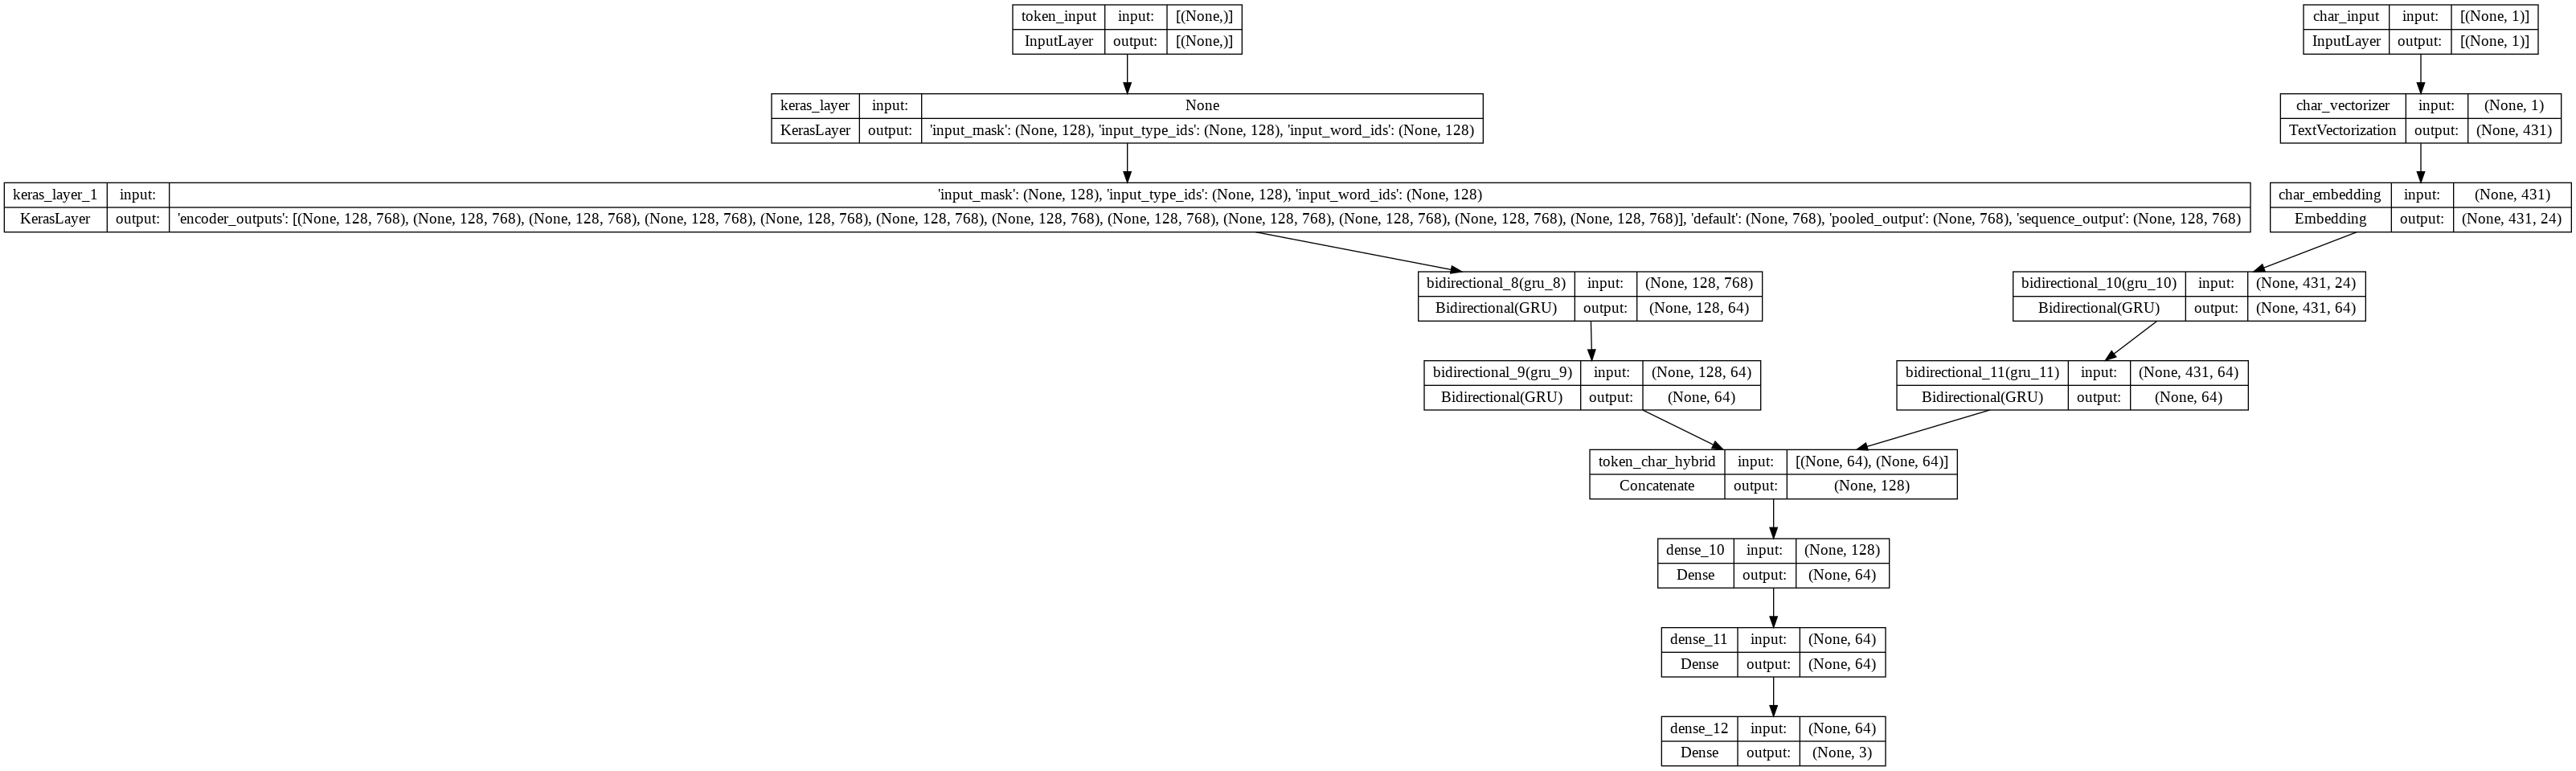

In [ ]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(model7,show_shapes=True)

In [ ]:
model7.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
history7=model7.fit(train_hybrid_dataset,
                    epochs=5,
                    validation_data=val_hybrid_dataset,
                    validation_steps=int(0.1*len(val_hybrid_dataset)))

Epoch 1/5
258/258 [==============================] - 141s 464ms/step - loss: 0.5489 - accuracy: 0.7776 - val_loss: 0.4553 - val_accuracy: 0.7969
Epoch 2/5
258/258 [==============================] - 114s 441ms/step - loss: 0.3597 - accuracy: 0.8644 - val_loss: 0.5243 - val_accuracy: 0.8281
Epoch 3/5
258/258 [==============================] - 115s 446ms/step - loss: 0.2801 - accuracy: 0.8988 - val_loss: 0.6284 - val_accuracy: 0.8281
Epoch 4/5
258/258 [==============================] - 115s 447ms/step - loss: 0.2043 - accuracy: 0.9333 - val_loss: 0.7287 - val_accuracy: 0.7969
Epoch 5/5
258/258 [==============================] - 114s 442ms/step - loss: 0.1590 - accuracy: 0.9483 - val_loss: 0.8272 - val_accuracy: 0.7969


In [ ]:
model7_pred_probs=model7.predict(val_hybrid_dataset)
model7_pred=tf.argmax(model7_pred_probs,axis=1)
model7_results=calculate_results(val_label_encoded,model7_pred)

29/29 [==============================] - 16s 335ms/step


In [ ]:
model7_results

{'accuracy': 84.60698689956332,
 'precision': 0.8489925243644988,
 'recall': 0.8460698689956332,
 'f1': 0.8426063548808446}

In [ ]:
model7_report=pd.DataFrame(classification_report(val_label_encoded,model7_pred,output_dict=True)).transpose()

# Preparing Positional Embedding and Section names

## Cleaning section names

In [ ]:
train_df['sectionName'].value_counts()

Discussion                                                                     1240
Introduction                                                                    834
Methods                                                                         800
                                                                                587
DISCUSSION                                                                      483
                                                                               ... 
BCG–IFN in BCG failures                                                           1
4.1 Setup                                                                         1
Quantitative community structure                                                  1
The present studies                                                               1
4.3. Deceleration of the slow exchanging substrate in the S2→ S3 transition       1
Name: sectionName, Length: 1147, dtype: int64

In [ ]:
import re
def clean_section(text):
  if isinstance(text,str):
    re.sub('[^A-Za-z]', '', text)
    return text.capitalize()
  return ""

In [ ]:
train_df['sectionName']=train_df['sectionName'].apply(clean_section)

In [ ]:
train_df['sectionName'].value_counts()

Discussion                                                                     1727
Introduction                                                                   1097
Methods                                                                        1097
                                                                                606
Results                                                                         521
                                                                               ... 
Momentum balance                                                                  1
Tail suspension test                                                              1
3. molecular characteristics of s-iga as a mucosal immunoglobulin                 1
2.2 bit-wise noise                                                                1
4.3. deceleration of the slow exchanging substrate in the s2→ s3 transition       1
Name: sectionName, Length: 1074, dtype: int64

In [ ]:
int(np.percentile(list(train_df['sectionName'].value_counts()),98))

17

In [ ]:
# Use tensorflow to create One-hot-encoded tensors for line number
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
train_section_one_hot=ohe.fit_transform(train_df['sectionName'].to_numpy().reshape(-1, 1))
val_section_one_hot=ohe.transform(val_df['sectionName'].to_numpy().reshape(-1, 1))
test_section_one_hot=ohe.transform(test_df['sectionName'].to_numpy().reshape(-1, 1))

## Normalizing CiteStart and CiteEnd

In [ ]:
train_cite_df=train_df[['citeStart','citeEnd']].fillna(-1)
val_cite_df=val_df[['citeStart','citeEnd']].fillna(-1)
test_cite_df=test_df[['citeStart','citeEnd']].fillna(-1)

In [ ]:
train_cite_df.shape

(8243, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms=MinMaxScaler()
train_cite_minmax=mms.fit_transform(train_cite_df)
val_cite_minmax=mms.transform(val_cite_df)
test_cite_minmax=mms.transform(test_cite_df)

## Creating The tribrid dataset

In [ ]:
# combines chars and tokens into the dataset
train_tribrid_data=tf.data.Dataset.from_tensor_slices((train_sentences,
                                                       train_chars,
                                                       train_section_one_hot,
                                                       train_cite_minmax))
train_tribrid_labels=tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_tribrid_dataset=tf.data.Dataset.zip((train_tribrid_data,train_tribrid_labels))
# batch and prefetch
train_tribrid_dataset=train_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# combines chars and tokens into the dataset
val_tribrid_data=tf.data.Dataset.from_tensor_slices((val_sentences,
                                                     val_chars,
                                                     val_section_one_hot,
                                                     val_cite_minmax))
val_tribrid_labels=tf.data.Dataset.from_tensor_slices(val_label_one_hot)
val_tribrid_dataset=tf.data.Dataset.zip((val_tribrid_data,val_tribrid_labels))
# batch and prefetch
val_tribrid_dataset=val_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



# combines chars and tokens into the dataset
test_tribrid_data=tf.data.Dataset.from_tensor_slices((test_sentences,
                                                      test_chars,
                                                      test_section_one_hot,
                                                      test_cite_minmax))
test_tribrid_labels=tf.data.Dataset.from_tensor_slices(test_label_one_hot)
test_tribrid_dataset=tf.data.Dataset.zip((test_tribrid_data,test_tribrid_labels))
# batch and prefetch
test_tribrid_dataset=test_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Model8: Using positional embeddings and sectionName

In [ ]:

#Token model
token_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string,name="token_input")
token_preprocesser= preprocessor(token_inputs)
token_encoder = encoder(token_preprocesser)
token_encoded_output = token_encoder["sequence_output"]
token_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(token_encoded_output)
token_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(token_bi_gru1)
token_model=tf.keras.Model(token_inputs,token_outputs)


##Char model
char_inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,),name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeds=char_embedding(char_vectors)
char_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(char_embeds)
char_bi_gru2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(char_bi_gru1)
char_model=tf.keras.Model(char_inputs,char_bi_gru2)


#Section name Model
section_inputs=tf.keras.layers.Input(shape=(1074,),dtype=tf.float32,name='section_Input')
section_dense=tf.keras.layers.Dense(16,activation='relu')(section_inputs)
section_outputs=tf.keras.layers.Dense(16,activation='relu')(section_dense)
section_model=tf.keras.Model(section_inputs,section_outputs)

#Cite model
cite_inputs=tf.keras.layers.Input(shape=(2,),dtype=tf.float32,name='cite_Input')
cite_dense=tf.keras.layers.Dense(16,activation='relu')(cite_inputs)
cite_outputs=tf.keras.layers.Dense(16,activation='relu')(cite_dense)
cite_model=tf.keras.Model(cite_inputs,cite_outputs)


#concatenation
token_char_concat= tf.keras.layers.Concatenate(name='token_char_cite_section')([token_model.output,
                                                                          char_model.output,
                                                                          section_model.output,
                                                                          cite_model.output])

#combined
combined_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
combined_dense2=tf.keras.layers.Dense(64,activation='relu')(combined_dense)
output_layer=tf.keras.layers.Dense(num_classes,activation='softmax')(combined_dense2)

# 6. Construct model with char and token inputs

model8=tf.keras.Model(inputs=[token_model.inputs,char_model.inputs,section_model.inputs,cite_model.inputs],
                      outputs=output_layer,
                      name='Token_char_cite_section_model')

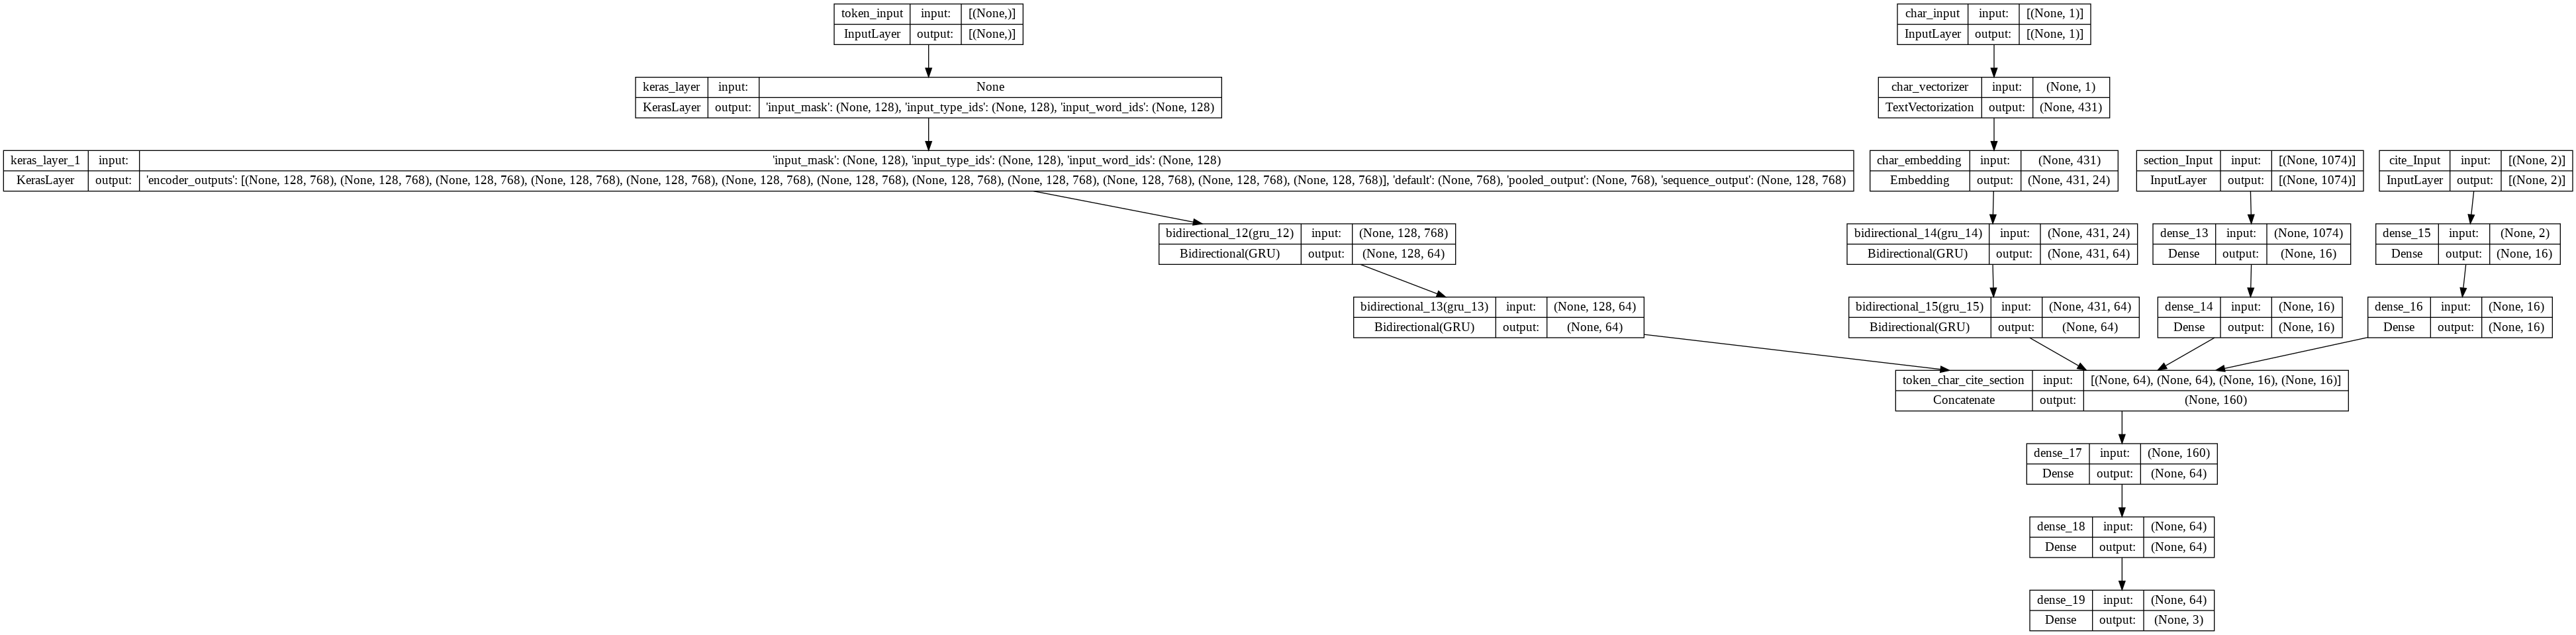

In [ ]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(model8,show_shapes=True)

In [ ]:
model8.summary()

Model: "Token_char_cite_section_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['token_input[0][0]']            
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                          

In [ ]:
model8.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
# Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print when the lr is reduced
                                                 min_lr=1e-7)

In [ ]:
history8=model8.fit(train_tribrid_dataset,
                    epochs=100,
                    validation_data=val_tribrid_dataset,
                    validation_steps=int(0.1*len(val_tribrid_dataset)),
                    callbacks=[early_stopping,reduce_lr])

Epoch 1/100
258/258 [==============================] - 141s 467ms/step - loss: 0.7523 - accuracy: 0.7893 - val_loss: 0.7319 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 2/100
258/258 [==============================] - 114s 443ms/step - loss: 0.6487 - accuracy: 0.8769 - val_loss: 0.7282 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 3/100
258/258 [==============================] - 115s 445ms/step - loss: 0.6085 - accuracy: 0.9144 - val_loss: 0.7429 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 4/100
258/258 [==============================] - ETA: 0s - loss: 0.5761 - accuracy: 0.9419
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
258/258 [==============================] - 115s 446ms/step - loss: 0.5761 - accuracy: 0.9419 - val_loss: 0.8284 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/100
258/258 [==============================] - 114s 443ms/step - loss: 0.5437 - accuracy: 0.9621 - val_loss: 0.7734 - val_accuracy: 0.8438 - lr: 2.0000e-04


In [ ]:
model8_pred_probs=model8.predict(val_tribrid_dataset)
model8_pred=tf.argmax(model8_pred_probs,axis=1)
model8_results=calculate_results(val_label_encoded,model8_pred)

29/29 [==============================] - 16s 336ms/step


In [ ]:
model8_results

{'accuracy': 84.60698689956332,
 'precision': 0.8510416151008101,
 'recall': 0.8460698689956332,
 'f1': 0.8472395814861805}

In [ ]:
model8_report=pd.DataFrame(classification_report(val_label_encoded,model8_pred,output_dict=True)).transpose()

# Comparing model results

## Comparing overall results

In [ ]:
baseline_results['Model']="Baseline"
model1_results['Model']='Model1'
model2_results['Model']='Model2'
model3_results['Model']='Model3'
model4_results['Model']='Model4'
model5_results['Model']='Model5'
model6_results['Model']='Model6'
model7_results['Model']='Model7'
model8_results['Model']='Model8'

In [ ]:
results_label1_df=pd.DataFrame([baseline_results,model1_results,model2_results,model3_results,model4_results,model5_results,
                         model6_results,model7_results,model8_results])

In [ ]:
results_label1_df.set_index("Model")

,accuracy,precision,recall,f1
Model,,,,
Baseline,65.938865,0.614956,0.659389,0.577412
Model1,79.912664,0.799572,0.799127,0.798910
Model2,78.275109,0.782302,0.782751,0.781111
Model3,80.021834,0.801222,0.800218,0.795917
Model4,74.235808,0.742674,0.742358,0.735727
Model5,80.021834,0.825247,0.800218,0.798230
Model6,78.711790,0.789617,0.787118,0.788133
Model7,84.606987,0.848993,0.846070,0.842606
Model8,84.606987,0.851042,0.846070,0.847240


## Comparing class by class Results

In [ ]:
report_label1=pd.concat([baseline_report,model1_report,model2_report,model3_report,model4_report,model5_report,
                         model6_report,model7_report,model8_report],
                     keys=['Baseline Model','Conv1D Model','BiGRU Model','Conv1D-char Model','BiGRU-char Model','BERT-BiGRU',
                           'USE-Dense Model','BERT-BiGRU-char+Token Model','BERT-BiGRU-char+token+pos Model'])

In [ ]:
as_list = report_label1.index.tolist()
indexes=[]
for x in as_list:
  if x[1]=='0':
    indexes.append((x[0],class_names[0]))
  elif x[1]=='1':
    indexes.append((x[0],class_names[1]))
  elif x[1]=='2':
    indexes.append((x[0],class_names[2]))
  else:
    indexes.append((x[0],x[1]))
idx = pd.MultiIndex.from_tuples(indexes)
report_label1.index=idx

In [ ]:
report_label1

precision    recall  f1-score  \
Baseline Model                  background     0.637681  0.981413  0.773060   
                                method         0.863636  0.298039  0.443149   
                                result         0.000000  0.000000  0.000000   
                                accuracy       0.659389  0.659389  0.659389   
                                macro avg      0.500439  0.426484  0.405403   
                                weighted avg   0.614956  0.659389  0.577412   
Conv1D Model                    background     0.838235  0.847584  0.842884   
                                method         0.768908  0.717647  0.742394   
                                result         0.694030  0.756098  0.723735   
                                accuracy       0.799127  0.799127  0.799127   
                                macro avg      0.767058  0.773776  0.769671   
                                weighted avg   0.799572  0.799127  0.798910   
BiGRU Model                     background     0.814286  0.847584  0.830601   
                                method         0.713178  0.721569  0.717349   
                                result         0.785714  0.626016  0.696833   
                                accuracy       0.782751  0.782751  0.782751   
                                macro avg      0.771059  0.731723  0.748261   
                                weighted avg   0.782302  0.782751  0.781111   
Conv1D-char Model               background     0.800000  0.899628  0.846894   
                                method         0.837438  0.666667  0.742358   
                                result         0.731481  0.642276  0.683983   
                                accuracy       0.800218  0.800218  0.800218   
                                macro avg      0.789640  0.736190  0.757745   
                                weighted avg   0.801222  0.800218  0.795917   
BiGRU-char Model                background     0.769103  0.860595  0.812281   
                                method         0.751381  0.533333  0.623853   
                                result         0.609023  0.658537  0.632813   
                                accuracy       0.742358  0.742358  0.742358   
                                macro avg      0.709836  0.684155  0.689649   
                                weighted avg   0.742674  0.742358  0.735727   
BERT-BiGRU                      background     0.822917  0.881041  0.850987   
                                method         0.938272  0.596078  0.729017   
                                result         0.601124  0.869919  0.710963   
                                accuracy       0.800218  0.800218  0.800218   
                                macro avg      0.787437  0.782346  0.763656   
                                weighted avg   0.825247  0.800218  0.798230   
USE-Dense Model                 background     0.841210  0.827138  0.834114   
                                method         0.757937  0.749020  0.753452   
                                result         0.629630  0.691057  0.658915   
                                accuracy       0.787118  0.787118  0.787118   
                                macro avg      0.742925  0.755738  0.748827   
                                weighted avg   0.789617  0.787118  0.788133   
BERT-BiGRU-char+Token Model     background     0.834437  0.936803  0.882662   
                                method         0.887255  0.709804  0.788671   
                                result         0.833333  0.731707  0.779221   
                                accuracy       0.846070  0.846070  0.846070   
                                macro avg      0.851675  0.792771  0.816851   
                                weighted avg   0.848993  0.846070  0.842606   
BERT-BiGRU-char+token+pos Model background     0.900596  0.842007  0.870317   
                                method         0.797794  0.850980  0.823529   
                 

In [ ]:
report_label1.to_csv('label1_results.csv')

## Testing on Test data

In [ ]:
model5.evaluate(test_dataset)

59/59 [==============================] - 19s 315ms/step - loss: 0.7561 - accuracy: 0.7593


[0.7560896277427673, 0.7592692375183105]

In [ ]:
model3.evaluate(test_char_dataset)

59/59 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.7657


[0.5739924311637878, 0.7657173275947571]

In [ ]:
model7.evaluate(test_hybrid_dataset)

59/59 [==============================] - 20s 340ms/step - loss: 0.6745 - accuracy: 0.8146


[0.6745182275772095, 0.814615786075592]

In [ ]:
model8.evaluate(test_tribrid_dataset)

59/59 [==============================] - 21s 349ms/step - loss: 0.7238 - accuracy: 0.8275


[0.7237793207168579, 0.8275120854377747]

In [ ]:
model7_test_pred_probs=model7.predict(test_hybrid_dataset)
model7_test_pred=tf.argmax(model7_test_pred_probs,axis=1)
print(classification_report(test_label_encoded,model7_test_pred))

59/59 [==============================] - 20s 345ms/step
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       997
           1       0.90      0.69      0.78       605
           2       0.76      0.73      0.74       259

    accuracy                           0.81      1861
   macro avg       0.82      0.78      0.79      1861
weighted avg       0.82      0.81      0.81      1861



In [ ]:
model8_test_pred_probs=model8.predict(test_tribrid_dataset)
model8_test_pred=tf.argmax(model8_test_pred_probs,axis=1)
print(classification_report(test_label_encoded,model8_test_pred))

59/59 [==============================] - 20s 336ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       997
           1       0.83      0.83      0.83       605
           2       0.67      0.86      0.75       259

    accuracy                           0.83      1861
   macro avg       0.79      0.84      0.81      1861
weighted avg       0.84      0.83      0.83      1861



# IsKeyCitation Classification

## Baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
pipeline.fit(train_sentences,train_df['isKeyCitation'])

In [ ]:
pipeline.score(val_sentences,val_df['isKeyCitation'])

In [ ]:
baseline_preds=pipeline.predict(val_sentences)

In [ ]:
baseline_key_results=calculate_results(val_isKey_label,baseline_preds)
baseline_key_results

## Creating Tf.data dataset for deep learning models

In [ ]:
# Turn our data into tensorflow dataets
train_key_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_iskey_one_hot))
val_key_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_iskey_one_hot))
test_key_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_iskey_one_hot))

In [ ]:
# Take the tensorflow datasets batch and prefetch them
train_key_dataset=train_key_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_key_dataset=val_key_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_key_dataset=test_key_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Modelling

## Model1: Using custom embedding with BIGRU

In [ ]:
inputs=tf.keras.layers.Input(dtype=tf.string,shape=[])

x=text_vectorizer(inputs)
x=embedding(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16,activation='tanh'))(x)
outputs=tf.keras.layers.Dense(2,activation='softmax')(x)

key_model1=tf.keras.Model(inputs,outputs)

In [ ]:
key_model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
key_history1=key_model1.fit(train_key_dataset,
                    epochs=5,
                    validation_data=val_key_dataset,
                    validation_steps=int(0.1*len(val_key_dataset)))

In [ ]:
key_model1.evaluate(val_key_dataset)

In [ ]:
model1_pred_probs=key_model1.predict(val_key_dataset)
model1_pred=tf.squeeze(tf.round(model1_pred_probs))
model1_key_results=calculate_results(val_iskey_one_hot,model1_pred)

In [ ]:
model1_key_results

##Model2: Using BERT

In [ ]:
import tensorflow_text
import tensorflow_hub as hub
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

encoder = hub.KerasLayer(
    "https://tfhub.dev/google/experts/bert/wiki_books/2",
    trainable=False)

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)

x= preprocessor(inputs)
x = encoder(x)
x = x["sequence_output"]
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(2,activation='softmax')(x)

key_model2=tf.keras.Model(inputs,outputs)

In [ ]:
key_model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
key_model2.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     {'input_mask': (Non  0           ['input_14[0][0]']               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                               

In [ ]:
key_history2=key_model2.fit(train_key_dataset,
                    epochs=5,
                    validation_data=val_key_dataset,
                    validation_steps=int(0.1*len(val_key_dataset)))

Epoch 1/5
258/258 [==============================] - 217s 375ms/step - loss: 0.6765 - accuracy: 0.5701 - val_loss: 0.6424 - val_accuracy: 0.6719
Epoch 2/5
258/258 [==============================] - 94s 364ms/step - loss: 0.6480 - accuracy: 0.6129 - val_loss: 0.6584 - val_accuracy: 0.6250


In [ ]:
key_model2.evaluate(val_key_dataset)

In [ ]:
model2_pred_probs=key_model2.predict(val_key_dataset)
model2_pred=tf.squeeze(tf.round(model2_pred_probs))
key_model2_results=calculate_results(val_iskey_one_hot,model2_pred)

In [ ]:
key_model2_results

# Model 9: Multi-output model, Predictiing label 1,label2 and isKeyCitation

## Creating Char and token dataset with multiouputs

In [ ]:
# combines chars and tokens into the dataset
train_multi_out_brid_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_multi_out_brid_labels=tf.data.Dataset.from_tensor_slices((train_label_one_hot,train_label2_one_hot,train_iskey_one_hot))
train_multi_out_brid_dataset=tf.data.Dataset.zip((train_multi_out_brid_data,train_multi_out_brid_labels))
# batch and prefetch
train_multi_out_brid_dataset=train_multi_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# combines chars and tokens into the dataset
val_multi_out_brid_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_multi_out_brid_labels=tf.data.Dataset.from_tensor_slices((val_label_one_hot,val_label2_one_hot,val_iskey_one_hot))
val_multi_out_brid_dataset=tf.data.Dataset.zip((val_multi_out_brid_data,val_multi_out_brid_labels))
# batch and prefetch
val_multi_out_brid_dataset=val_multi_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



# combines chars and tokens into the dataset
test_multi_out_brid_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_multi_out_brid_labels=tf.data.Dataset.from_tensor_slices((test_label_one_hot,test_label2_one_hot,test_iskey_one_hot))
test_multi_out_brid_dataset=tf.data.Dataset.zip((test_multi_out_brid_data,test_multi_out_brid_labels))
# batch and prefetch
test_multi_out_brid_dataset=test_multi_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [ ]:

#Token model
token_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string,name="token_input")
token_preprocesser= preprocessor(token_inputs)
token_encoder = encoder(token_preprocesser)
token_encoded_output = token_encoder["sequence_output"]
token_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(token_encoded_output)
token_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(token_bi_gru1)
token_model=tf.keras.Model(token_inputs,token_outputs)





##Char model
char_inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,),name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeds=char_embedding(char_vectors)
char_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(char_embeds)
char_bi_gru2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(char_bi_gru1)
char_model=tf.keras.Model(char_inputs,char_bi_gru2)


#concatenation
token_char_concat= tf.keras.layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                          char_model.output])


#Label 1 output
label1_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
label1_dense2=tf.keras.layers.Dense(64,activation='relu')(label1_dense)
label1_output_layer=tf.keras.layers.Dense(num_classes,activation='softmax',name='Label1')(label1_dense2)

#Label 2 output
label2_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
label2_dense2=tf.keras.layers.Dense(64,activation='relu')(label2_dense)
label2_output_layer=tf.keras.layers.Dense(num_classes2,activation='softmax',name='Label2')(label2_dense2)


#isKeyCitation output
isKey_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
isKey_dense2=tf.keras.layers.Dense(64,activation='relu')(isKey_dense)
isKey_output_layer=tf.keras.layers.Dense(2,activation='softmax',name='IsKey_Citation')(isKey_dense2)

# 6. Construct model with char and token inputs

multi_output_model=tf.keras.Model(inputs=[token_model.input,char_model.input],
                      outputs=[label1_output_layer,label2_output_layer,isKey_output_layer],
                      name='Token_char_multioutput_model')

In [ ]:
multi_output_model.summary()

Model: "Token_char_multioutput_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['token_input[0][0]']            
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                               

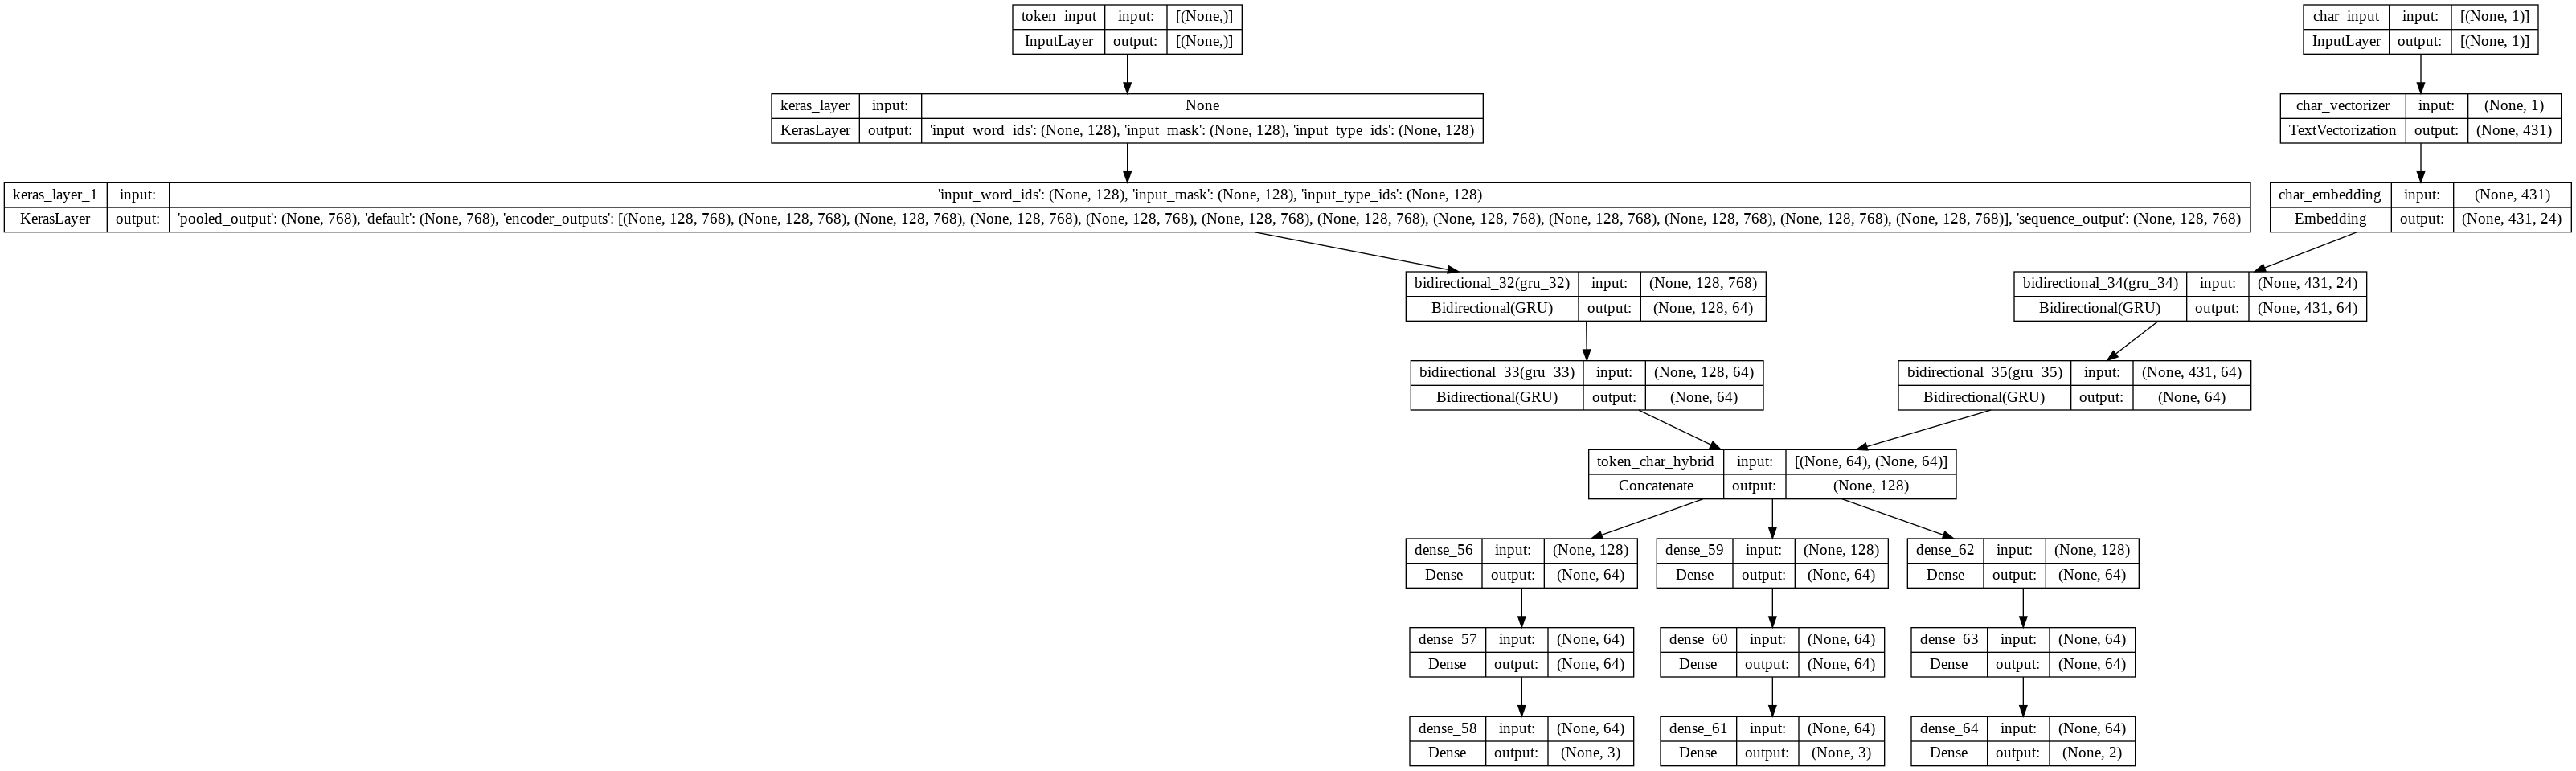

In [ ]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(multi_output_model,show_shapes=True)

In [ ]:
multi_output_model.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
multi_output_model_history2=multi_output_model.fit(train_multi_out_brid_dataset,
                    epochs=5,
                    validation_data=val_multi_out_brid_dataset,
                    validation_steps=int(0.1*len(val_multi_out_brid_dataset)))

Epoch 1/5
258/258 [==============================] - 154s 514ms/step - loss: 1.5526 - dense_58_loss: 0.5908 - dense_61_loss: 0.2864 - dense_64_loss: 0.6755 - dense_58_accuracy: 0.7532 - dense_61_accuracy: 0.9088 - dense_64_accuracy: 0.5690 - val_loss: 1.2688 - val_dense_58_loss: 0.4090 - val_dense_61_loss: 0.2049 - val_dense_64_loss: 0.6549 - val_dense_58_accuracy: 0.8400 - val_dense_61_accuracy: 0.9262 - val_dense_64_accuracy: 0.5888
Epoch 2/5
258/258 [==============================] - 126s 489ms/step - loss: 1.2231 - dense_58_loss: 0.3760 - dense_61_loss: 0.1916 - dense_64_loss: 0.6555 - dense_58_accuracy: 0.8572 - dense_61_accuracy: 0.9256 - dense_64_accuracy: 0.6000 - val_loss: 1.1440 - val_dense_58_loss: 0.3416 - val_dense_61_loss: 0.1631 - val_dense_64_loss: 0.6394 - val_dense_58_accuracy: 0.8687 - val_dense_61_accuracy: 0.9362 - val_dense_64_accuracy: 0.6225
Epoch 3/5
258/258 [==============================] - 126s 487ms/step - loss: 1.1029 - dense_58_loss: 0.3049 - dense_61_los

In [ ]:
multi_output_model.evaluate(val_multi_out_brid_dataset)

29/29 [==============================] - 12s 426ms/step - loss: 1.5951 - dense_58_loss: 0.6222 - dense_61_loss: 0.2858 - dense_64_loss: 0.6872 - dense_58_accuracy: 0.8286 - dense_61_accuracy: 0.9181 - dense_64_accuracy: 0.5983


[1.5950994491577148,
 0.6221674084663391,
 0.28576695919036865,
 0.6871652007102966,
 0.8286026120185852,
 0.9181222915649414,
 0.5982532501220703]

In [ ]:
multi_output_model.evaluate(test_multi_out_brid_dataset)

59/59 [==============================] - 22s 371ms/step - loss: 1.6513 - dense_58_loss: 0.5924 - dense_61_loss: 0.4070 - dense_64_loss: 0.6519 - dense_58_accuracy: 0.8270 - dense_61_accuracy: 0.8684 - dense_64_accuracy: 0.6099


[1.6512813568115234,
 0.5923871397972107,
 0.4070124626159668,
 0.6518816351890564,
 0.8269747495651245,
 0.8683503270149231,
 0.6098871827125549]

* Dense58 'label1': Accuracy 82.70
* Dense61 'label2': Accuracy 86.84
* Dense64 'IS key citation': 60.99

# Model 10: Multi-lable model, predicting label 1 and label2

## Creating char token dataset with duo output

In [ ]:
# combines chars and tokens into the dataset
train_duo_out_brid_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_duo_out_brid_labels=tf.data.Dataset.from_tensor_slices((train_label_one_hot,train_label2_one_hot))
train_duo_out_brid_dataset=tf.data.Dataset.zip((train_duo_out_brid_data,train_duo_out_brid_labels))
# batch and prefetch
train_duo_out_brid_dataset=train_duo_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# combines chars and tokens into the dataset
val_duo_out_brid_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_duo_out_brid_labels=tf.data.Dataset.from_tensor_slices((val_label_one_hot,val_label2_one_hot))
val_duo_out_brid_dataset=tf.data.Dataset.zip((val_duo_out_brid_data,val_duo_out_brid_labels))
# batch and prefetch
val_duo_out_brid_dataset=val_duo_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



# combines chars and tokens into the dataset
test_duo_out_brid_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_duo_out_brid_labels=tf.data.Dataset.from_tensor_slices((test_label_one_hot,test_label2_one_hot))
test_duo_out_brid_dataset=tf.data.Dataset.zip((test_duo_out_brid_data,test_duo_out_brid_labels))
# batch and prefetch
test_duo_out_brid_dataset=test_duo_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



## Modelling

In [ ]:
#Token model
token_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string,name="token_input")
token_preprocesser= preprocessor(token_inputs)
token_encoder = encoder(token_preprocesser)
token_encoded_output = token_encoder["sequence_output"]
token_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(token_encoded_output)
token_dropout=tf.keras.layers.Dropout(0.3)(token_bi_gru1)
token_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(token_dropout)
token_model=tf.keras.Model(token_inputs,token_outputs)





##Char model
char_inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,),name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeds=char_embedding(char_vectors)
char_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(char_embeds)
char_dropout=tf.keras.layers.Dropout(0.3)(char_bi_gru1)
char_bi_gru2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(char_dropout)
char_model=tf.keras.Model(char_inputs,char_bi_gru2)


#concatenation
token_char_concat= tf.keras.layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                          char_model.output])


#Label 1 output
label1_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
label1_dense2=tf.keras.layers.Dense(64,activation='relu')(label1_dense)
label1_output_layer=tf.keras.layers.Dense(num_classes,activation='softmax',name='Label1')(label1_dense2)

#Label 2 output
label2_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
label2_dense2=tf.keras.layers.Dense(64,activation='relu')(label2_dense)
label2_output_layer=tf.keras.layers.Dense(num_classes2,activation='softmax',name='Label2')(label2_dense2)



# 6. Construct model with char and token inputs

duo_output_model=tf.keras.Model(inputs=[token_model.input,char_model.input],
                      outputs=[label1_output_layer,label2_output_layer],
                      name='Token_char_duooutput_model')

In [ ]:
duo_output_model.summary()

Model: "Token_char_duooutput_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['token_input[0][0]']            
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                             

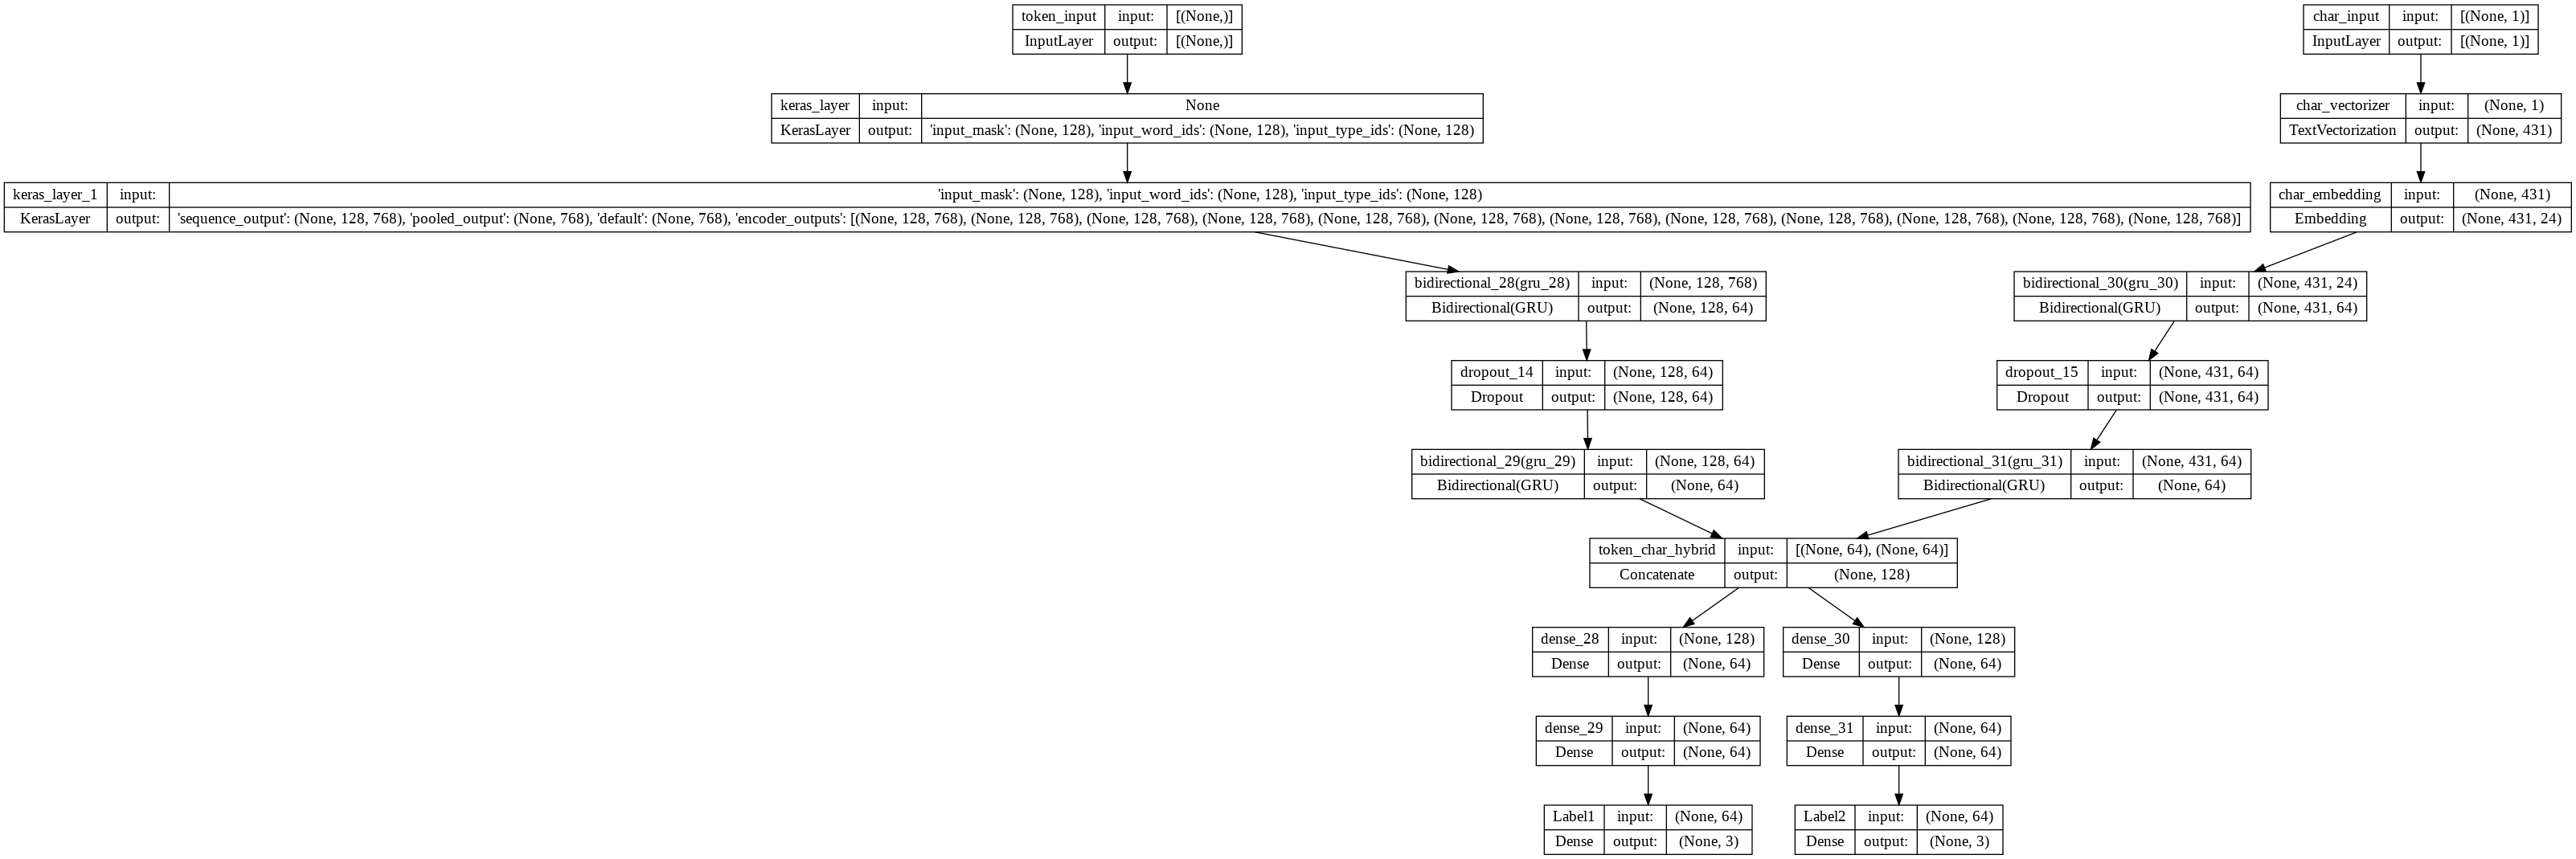

In [ ]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(duo_output_model,show_shapes=True)

In [ ]:
duo_output_model.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
duo_output_model_history=duo_output_model.fit(train_duo_out_brid_dataset,
                    epochs=5,
                    validation_data=val_duo_out_brid_dataset,
                    validation_steps=int(0.1*len(val_duo_out_brid_dataset)))

Epoch 1/5
258/258 [==============================] - 144s 481ms/step - loss: 0.8637 - Label1_loss: 0.5927 - Label2_loss: 0.2710 - Label1_accuracy: 0.7517 - Label2_accuracy: 0.9134 - val_loss: 0.8290 - val_Label1_loss: 0.4855 - val_Label2_loss: 0.3434 - val_Label1_accuracy: 0.8125 - val_Label2_accuracy: 0.8438
Epoch 2/5
258/258 [==============================] - 117s 454ms/step - loss: 0.5702 - Label1_loss: 0.3810 - Label2_loss: 0.1892 - Label1_accuracy: 0.8561 - Label2_accuracy: 0.9266 - val_loss: 0.8604 - val_Label1_loss: 0.4936 - val_Label2_loss: 0.3668 - val_Label1_accuracy: 0.8281 - val_Label2_accuracy: 0.8125
Epoch 3/5
258/258 [==============================] - 117s 454ms/step - loss: 0.4812 - Label1_loss: 0.3156 - Label2_loss: 0.1656 - Label1_accuracy: 0.8812 - Label2_accuracy: 0.9299 - val_loss: 1.0933 - val_Label1_loss: 0.6204 - val_Label2_loss: 0.4730 - val_Label1_accuracy: 0.8281 - val_Label2_accuracy: 0.8281
Epoch 4/5
258/258 [==============================] - 117s 453ms/ste

In [ ]:
duo_output_model.evaluate(val_duo_out_brid_dataset)

29/29 [==============================] - 11s 370ms/step - loss: 0.8887 - Label1_loss: 0.6051 - Label2_loss: 0.2836 - Label1_accuracy: 0.8362 - Label2_accuracy: 0.9214


[0.888653039932251,
 0.6050818562507629,
 0.2835710644721985,
 0.836244523525238,
 0.9213973879814148]

In [ ]:
duo_output_model.evaluate(test_duo_out_brid_dataset)

59/59 [==============================] - 22s 365ms/step - loss: 1.0233 - Label1_loss: 0.6218 - Label2_loss: 0.4015 - Label1_accuracy: 0.8146 - Label2_accuracy: 0.8769


[1.0233145952224731,
 0.621779203414917,
 0.40153560042381287,
 0.814615786075592,
 0.8769478797912598]

## Validation data evaluation

In [ ]:
model10_pred_probs=duo_output_model.predict(val_duo_out_brid_dataset)

model10_pred1=tf.argmax(model10_pred_probs[0],axis=1)
model10_pred2=tf.argmax(model10_pred_probs[1],axis=1)
model10_results1=calculate_results(val_label_encoded,model10_pred1)
model10_results2=calculate_results(val_label2_encoded,model10_pred2)

29/29 [==============================] - 18s 386ms/step


In [ ]:
model10_results1,model10_results2

({'accuracy': 83.84279475982532,
  'precision': 0.8412970788860853,
  'recall': 0.8384279475982532,
  'f1': 0.8349000853409683},
 {'accuracy': 92.35807860262008,
  'precision': 0.9150780433827447,
  'recall': 0.9235807860262009,
  'f1': 0.9171131297011105})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_label_encoded,model10_pred1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       538
           1       0.88      0.69      0.77       255
           2       0.83      0.76      0.79       123

    accuracy                           0.84       916
   macro avg       0.84      0.79      0.81       916
weighted avg       0.84      0.84      0.83       916



In [ ]:
print(classification_report(val_label2_encoded,model10_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       824
           1       0.58      0.77      0.66        53
           2       0.29      0.13      0.18        39

    accuracy                           0.92       916
   macro avg       0.61      0.62      0.60       916
weighted avg       0.92      0.92      0.92       916



## Test data evaluation

In [ ]:
model10_pred_probs_test=duo_output_model.predict(test_duo_out_brid_dataset)

model10_pred1_test=tf.argmax(model10_pred_probs_test[0],axis=1)
model10_pred2_test=tf.argmax(model10_pred_probs_test[1],axis=1)
model10_results1_test=calculate_results(test_label_encoded,model10_pred1_test)
model10_results2_test=calculate_results(test_label2_encoded,model10_pred2_test)

59/59 [==============================] - 23s 401ms/step


In [ ]:
model10_results1_test,model10_results2_test

({'accuracy': 81.35411069317571,
  'precision': 0.8182065425305368,
  'recall': 0.8135411069317571,
  'f1': 0.8114210665634416},
 {'accuracy': 87.7485222998388,
  'precision': 0.9185355920699114,
  'recall': 0.8774852229983879,
  'f1': 0.8711355043846726})

In [ ]:
print(classification_report(test_label_encoded,model10_pred1_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       997
           1       0.87      0.70      0.78       605
           2       0.77      0.76      0.76       259

    accuracy                           0.81      1861
   macro avg       0.81      0.79      0.80      1861
weighted avg       0.82      0.81      0.81      1861



In [ ]:
print(classification_report(test_label2_encoded,model10_pred2_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1617
           1       0.10      0.40      0.15        35
           2       0.83      0.17      0.28       209

    accuracy                           0.88      1861
   macro avg       0.63      0.52      0.47      1861
weighted avg       0.92      0.88      0.87      1861



# Model 11: Combining cite start, cite end and section names with char and token mbedding with multi output

## Creating multi input with cite start and end

In [ ]:
# combines chars and tokens into the dataset
train_multi_in_duo_out_brid_data=tf.data.Dataset.from_tensor_slices((train_sentences,
                                                       train_chars,
                                                       train_section_one_hot,
                                                       train_cite_minmax))
train_multi_in_duo_out_brid_labels=tf.data.Dataset.from_tensor_slices((train_label_one_hot,train_label2_one_hot))
train_multi_in_duo_out_brid_dataset=tf.data.Dataset.zip((train_multi_in_duo_out_brid_data,train_multi_in_duo_out_brid_labels))
# batch and prefetch
train_multi_in_duo_out_brid_dataset=train_multi_in_duo_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# combines chars and tokens into the dataset
val_multi_in_duo_out_brid_data=tf.data.Dataset.from_tensor_slices((val_sentences,
                                                     val_chars,
                                                     val_section_one_hot,
                                                     val_cite_minmax))
val_multi_in_duo_out_brid_labels=tf.data.Dataset.from_tensor_slices((val_label_one_hot,val_label2_one_hot))
val_multi_in_duo_out_brid_dataset=tf.data.Dataset.zip((val_multi_in_duo_out_brid_data,val_multi_in_duo_out_brid_labels))
# batch and prefetch
val_multi_in_duo_out_brid_dataset=val_multi_in_duo_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



# combines chars and tokens into the dataset
test_multi_in_duo_out_brid_data=tf.data.Dataset.from_tensor_slices((test_sentences,
                                                      test_chars,
                                                      test_section_one_hot,
                                                      test_cite_minmax))
test_multi_in_duo_out_brid_labels=tf.data.Dataset.from_tensor_slices((test_label_one_hot,test_label2_one_hot))
test_multi_in_duo_out_brid_dataset=tf.data.Dataset.zip((test_multi_in_duo_out_brid_data,test_multi_in_duo_out_brid_labels))
# batch and prefetch
test_multi_in_duo_out_brid_dataset=test_multi_in_duo_out_brid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Modelling

In [ ]:
#Token model
token_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string,name="token_input")
token_preprocesser= preprocessor(token_inputs)
token_encoder = encoder(token_preprocesser)
token_encoded_output = token_encoder["sequence_output"]
token_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(token_encoded_output)
token_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(token_bi_gru1)
token_model=tf.keras.Model(token_inputs,token_outputs)


##Char model
char_inputs=tf.keras.layers.Input(dtype=tf.string,shape=(1,),name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeds=char_embedding(char_vectors)
char_bi_gru1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,activation='tanh'))(char_embeds)
char_bi_gru2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,activation='tanh'))(char_bi_gru1)
char_model=tf.keras.Model(char_inputs,char_bi_gru2)


#Section name Model
section_inputs=tf.keras.layers.Input(shape=(1074,),dtype=tf.float32,name='section_Input')
section_dense=tf.keras.layers.Dense(16,activation='relu')(section_inputs)
section_outputs=tf.keras.layers.Dense(16,activation='relu')(section_dense)
section_model=tf.keras.Model(section_inputs,section_outputs)

#Cite model
cite_inputs=tf.keras.layers.Input(shape=(2,),dtype=tf.float32,name='cite_Input')
cite_dense=tf.keras.layers.Dense(16,activation='relu')(cite_inputs)
cite_outputs=tf.keras.layers.Dense(16,activation='relu')(cite_dense)
cite_model=tf.keras.Model(cite_inputs,cite_outputs)


#concatenation
token_char_concat= tf.keras.layers.Concatenate(name='token_char_cite_section')([token_model.output,
                                                                          char_model.output,
                                                                          section_model.output,
                                                                          cite_model.output])

#Label 1 output
label1_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
label1_dense2=tf.keras.layers.Dense(64,activation='relu')(label1_dense)
label1_output_layer=tf.keras.layers.Dense(num_classes,activation='softmax',name='Label1')(label1_dense2)

#Label 2 output
label2_dense=tf.keras.layers.Dense(64,activation='relu')(token_char_concat)
label2_dense2=tf.keras.layers.Dense(64,activation='relu')(label2_dense)
label2_output_layer=tf.keras.layers.Dense(num_classes2,activation='softmax',name='Label2')(label2_dense2)

# 6. Construct model with char and token inputs

multi_input_duo_output_model=tf.keras.Model(inputs=[token_model.input,char_model.input,section_model.input,cite_model.input],
                      outputs=[label1_output_layer,label2_output_layer],
                      name='multi_input_duo_output_model')

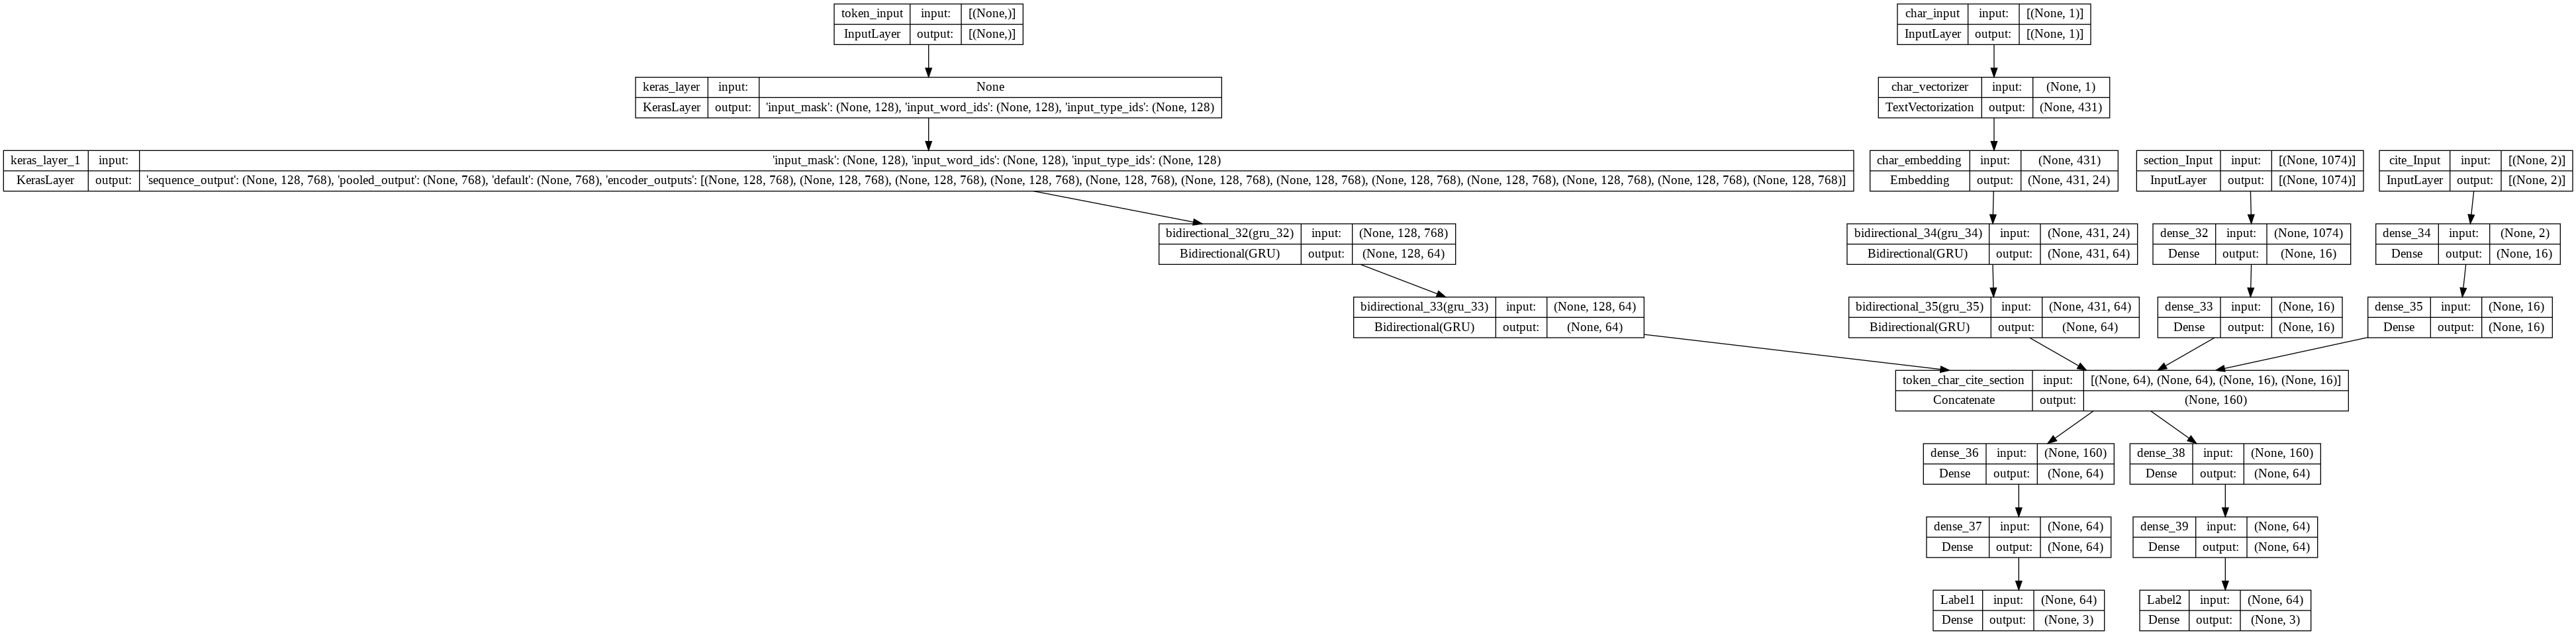

In [ ]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(multi_input_duo_output_model,show_shapes=True)

In [ ]:
multi_input_duo_output_model.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
multi_input_duo_output_model_history=multi_input_duo_output_model.fit(train_multi_in_duo_out_brid_dataset,
                                                          epochs=5,
                                                          validation_data=val_multi_in_duo_out_brid_dataset,
                                                          validation_steps=int(0.3*len(val_multi_in_duo_out_brid_dataset)))

Epoch 1/5
258/258 [==============================] - 195s 675ms/step - loss: 0.8226 - Label1_loss: 0.5492 - Label2_loss: 0.2735 - Label1_accuracy: 0.7752 - Label2_accuracy: 0.9103 - val_loss: 0.5391 - val_Label1_loss: 0.3815 - val_Label2_loss: 0.1576 - val_Label1_accuracy: 0.8711 - val_Label2_accuracy: 0.9375
Epoch 2/5
258/258 [==============================] - 121s 468ms/step - loss: 0.5159 - Label1_loss: 0.3336 - Label2_loss: 0.1823 - Label1_accuracy: 0.8730 - Label2_accuracy: 0.9283 - val_loss: 0.5595 - val_Label1_loss: 0.3989 - val_Label2_loss: 0.1605 - val_Label1_accuracy: 0.8438 - val_Label2_accuracy: 0.9258
Epoch 3/5
258/258 [==============================] - 120s 464ms/step - loss: 0.4204 - Label1_loss: 0.2612 - Label2_loss: 0.1592 - Label1_accuracy: 0.9017 - Label2_accuracy: 0.9340 - val_loss: 0.5919 - val_Label1_loss: 0.4155 - val_Label2_loss: 0.1764 - val_Label1_accuracy: 0.8477 - val_Label2_accuracy: 0.9297
Epoch 4/5
258/258 [==============================] - 120s 466ms/ste

## Validation data Evaluation

In [ ]:
multi_input_duo_output_model.evaluate(val_multi_in_duo_out_brid_dataset)

29/29 [==============================] - 11s 394ms/step - loss: 0.7748 - Label1_loss: 0.5165 - Label2_loss: 0.2583 - Label1_accuracy: 0.8526 - Label2_accuracy: 0.9225


[0.7748388648033142,
 0.5165095329284668,
 0.25832927227020264,
 0.8526200652122498,
 0.9224891066551208]

In [ ]:
multi_input_duo_output_model.evaluate(test_multi_in_duo_out_brid_dataset)

59/59 [==============================] - 23s 391ms/step - loss: 0.8994 - Label1_loss: 0.5329 - Label2_loss: 0.3665 - Label1_accuracy: 0.8345 - Label2_accuracy: 0.8737


[0.8993978500366211,
 0.532893180847168,
 0.3665047287940979,
 0.8344975709915161,
 0.8737238049507141]

In [ ]:
model11_pred_probs=multi_input_duo_output_model.predict(val_multi_in_duo_out_brid_dataset)

model11_pred1=tf.argmax(model11_pred_probs[0],axis=1)
model11_pred2=tf.argmax(model11_pred_probs[1],axis=1)
model11_results1=calculate_results(val_label_encoded,model11_pred1)
model11_results2=calculate_results(val_label2_encoded,model11_pred2)

In [ ]:
model11_results1

{'accuracy': 85.26200873362446,
 'precision': 0.8558038677449575,
 'recall': 0.8526200873362445,
 'f1': 0.8491291646256924}

In [ ]:
model11_results2

{'accuracy': 92.24890829694323,
 'precision': 0.9070246792633739,
 'recall': 0.9224890829694323,
 'f1': 0.9138490876783213}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_label_encoded,model11_pred1))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       538
           1       0.88      0.75      0.81       255
           2       0.88      0.68      0.77       123

    accuracy                           0.85       916
   macro avg       0.87      0.79      0.82       916
weighted avg       0.86      0.85      0.85       916



In [ ]:
print(classification_report(val_label2_encoded,model11_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       824
           1       0.60      0.68      0.64        53
           2       0.17      0.08      0.11        39

    accuracy                           0.92       916
   macro avg       0.58      0.58      0.57       916
weighted avg       0.91      0.92      0.91       916



## Test data evaluation

In [ ]:
model11_pred_probs_test=multi_input_duo_output_model.predict(test_multi_in_duo_out_brid_dataset)

model11_pred1_test=tf.argmax(model11_pred_probs_test[0],axis=1)
model11_pred2_test=tf.argmax(model11_pred_probs_test[1],axis=1)
model11_results1_test=calculate_results(test_label_encoded,model11_pred1_test)
model11_results2_test=calculate_results(test_label2_encoded,model11_pred2_test)

59/59 [==============================] - 22s 373ms/step


In [ ]:
model11_results1_test,model11_results2_test

({'accuracy': 83.44975819451908,
  'precision': 0.8373798327435011,
  'recall': 0.8344975819451907,
  'f1': 0.83277852756251},
 {'accuracy': 87.37238044062332,
  'precision': 0.9059984695628627,
  'recall': 0.8737238044062332,
  'f1': 0.8610406245966504})

In [ ]:
print(classification_report(test_label2_encoded,model11_pred2_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1617
           1       0.08      0.31      0.13        35
           2       0.79      0.12      0.21       209

    accuracy                           0.87      1861
   macro avg       0.60      0.47      0.43      1861
weighted avg       0.91      0.87      0.86      1861



In [ ]:
print(classification_report(test_label_encoded,model11_pred1_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       997
           1       0.88      0.76      0.82       605
           2       0.83      0.72      0.77       259

    accuracy                           0.83      1861
   macro avg       0.84      0.80      0.81      1861
weighted avg       0.84      0.83      0.83      1861

